**Importing Libraries**

In [1]:
import json, pandas, datetime, requests
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

**Reading and Writing Functions**

In [2]:
def json_yazma(data):
    for index, date in enumerate(data['date']):
        data['date'][index] = date.strftime("%m/%d/%Y, %H:%M:%S")

    with open('json_data.json', 'w') as outfile:
        json.dump(data, outfile)


In [3]:
def json_okuma():
    data_loaded = json.load(open('json_data.json'))
    for index, date in enumerate(data_loaded['date']):
        data_loaded['date'][index] = datetime.datetime.strptime(date, "%m/%d/%Y, %H:%M:%S")
    return data_loaded

**Data collecting from Alphavantage API**

In [4]:
def coin_data_collect(symbol = 'MANA',market = 'USD',interval='5min'):
    api_key = 'VKYYBU3O19HP6199'

    url = f'https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&outputsize=full&symbol={symbol}&market={market}&interval={interval}&apikey={api_key}'

    r = requests.get(url)
    data_collection = r.json()
    print('symbol: ', symbol , f'\n {symbol} Data Collected')
    
    with open('full_data.json', 'w') as outfile:
        json.dump(data_collection, outfile)
    
    data_col = {"open": [], "close": [], "low": [], "high": [], "volume": [], "date": []}

    for index, item in enumerate(data_collection[f"Time Series Crypto ({interval})"]):
        data_col["open"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["1. open"]))
        data_col["close"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["4. close"]))
        data_col["high"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["2. high"]))
        data_col["low"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["3. low"]))
        data_col["volume"].append(float(data_collection[f"Time Series Crypto ({interval})"][item]["5. volume"]))
        data_col["date"].append(datetime.datetime.strptime(item.replace('-','/'),'%Y/%m/%d %H:%M:%S')+timedelta(hours=3))

    return (data_col)


**Crypto Currency and Physical Currency Lists**

In [5]:
physical_currency_list={'currency code':['AED',	'AFN',	'ALL',	'AMD',	'ANG',	'AOA',	'ARS',	'AUD',	'AWG',	'AZN',	'BAM',	'BBD',	'BDT',	'BGN',	'BHD',	'BIF',	'BMD',	'BND',	'BOB',	'BRL',	'BSD',	'BTN',	'BWP',	'BZD',	'CAD',	'CDF',	'CHF',	'CLF',	'CLP',	'CNH',	'CNY',	'COP',	'CUP',	'CVE',	'CZK',	'DJF',	'DKK',	'DOP',	'DZD',	'EGP',	'ERN',	'ETB',	'EUR',	'FJD',	'FKP',	'GBP',	'GEL',	'GHS',	'GIP',	'GMD',	'GNF',	'GTQ',	'GYD',	'HKD',	'HNL',	'HRK',	'HTG',	'HUF',	'ICP',	'IDR',	'ILS',	'INR',	'IQD',	'IRR',	'ISK',	'JEP',	'JMD',	'JOD',	'JPY',	'KES',	'KGS',	'KHR',	'KMF',	'KPW',	'KRW',	'KWD',	'KYD',	'KZT',	'LAK',	'LBP',	'LKR',	'LRD',	'LSL',	'LYD',	'MAD',	'MDL',	'MGA',	'MKD',	'MMK',	'MNT',	'MOP',	'MRO',	'MRU',	'MUR',	'MVR',	'MWK',	'MXN',	'MYR',	'MZN',	'NAD',	'NGN',	'NOK',	'NPR',	'NZD',	'OMR',	'PAB',	'PEN',	'PGK',	'PHP',	'PKR',	'PLN',	'PYG',	'QAR',	'RON',	'RSD',	'RUB',	'RUR',	'RWF',	'SAR',	'SBDf',	'SCR',	'SDG',	'SDR',	'SEK',	'SGD',	'SHP',	'SLL',	'SOS',	'SRD',	'SYP',	'SZL',	'THB',	'TJS',	'TMT',	'TND',	'TOP',	'TRY',	'TTD',	'TWD',	'TZS',	'UAH',	'UGX',	'USD',	'UYU',	'UZS',	'VND',	'VUV',	'WST',	'XAF',	'XCD',	'XDR',	'XOF',	'XPF',	'YER',	'ZAR',	'ZMW',	'ZWL'],
'currency name':['United Arab Emirates Dirham',	'Afghan Afghani',	'Albanian Lek',	'Armenian Dram',	'Netherlands Antillean Guilder',	'Angolan Kwanza',	'Argentine Peso',	'Australian Dollar',	'Aruban Florin',	'Azerbaijani Manat',	'Bosnia-Herzegovina Convertible Mark',	'Barbadian Dollar',	'Bangladeshi Taka',	'Bulgarian Lev',	'Bahraini Dinar',	'Burundian Franc',	'Bermudan Dollar',	'Brunei Dollar',	'Bolivian Boliviano',	'Brazilian Real',	'Bahamian Dollar',	'Bhutanese Ngultrum',	'Botswanan Pula',	'Belize Dollar',	'Canadian Dollar',	'Congolese Franc',	'Swiss Franc',	'Chilean Unit of Account UF',	'Chilean Peso',	'Chinese Yuan Offshore',	'Chinese Yuan',	'Colombian Peso',	'Cuban Peso',	'Cape Verdean Escudo',	'Czech Republic Koruna',	'Djiboutian Franc',	'Danish Krone',	'Dominican Peso',	'Algerian Dinar',	'Egyptian Pound',	'Eritrean Nakfa',	'Ethiopian Birr',	'Euro',	'Fijian Dollar',	'Falkland Islands Pound',	'British Pound Sterling',	'Georgian Lari',	'Ghanaian Cedi',	'Gibraltar Pound',	'Gambian Dalasi',	'Guinean Franc',	'Guatemalan Quetzal',	'Guyanaese Dollar',	'Hong Kong Dollar',	'Honduran Lempira',	'Croatian Kuna',	'Haitian Gourde',	'Hungarian Forint',	'Internet Computer',	'Indonesian Rupiah',	'Israeli New Sheqel',	'Indian Rupee',	'Iraqi Dinar',	'Iranian Rial',	'Icelandic Krona',	'Jersey Pound',	'Jamaican Dollar',	'Jordanian Dinar',	'Japanese Yen',	'Kenyan Shilling',	'Kyrgystani Som',	'Cambodian Riel',	'Comorian Franc',	'North Korean Won',	'South Korean Won',	'Kuwaiti Dinar',	'Cayman Islands Dollar',	'Kazakhstani Tenge',	'Laotian Kip',	'Lebanese Pound',	'Sri Lankan Rupee',	'Liberian Dollar',	'Lesotho Loti',	'Libyan Dinar',	'Moroccan Dirham',	'Moldovan Leu',	'Malagasy Ariary',	'Macedonian Denar',	'Myanma Kyat',	'Mongolian Tugrik',	'Macanese Pataca',	'Mauritanian Ouguiya (pre-2018)',	'Mauritanian Ouguiya',	'Mauritian Rupee',	'Maldivian Rufiyaa',	'Malawian Kwacha',	'Mexican Peso',	'Malaysian Ringgit',	'Mozambican Metical',	'Namibian Dollar',	'Nigerian Naira',	'Norwegian Krone',	'Nepalese Rupee',	'New Zealand Dollar',	'Omani Rial',	'Panamanian Balboa',	'Peruvian Nuevo Sol',	'Papua New Guinean Kina',	'Philippine Peso',	'Pakistani Rupee',	'Polish Zloty',	'Paraguayan Guarani',	'Qatari Rial',	'Romanian Leu',	'Serbian Dinar',	'Russian Ruble',	'Old Russian Ruble',	'Rwandan Franc',	'Saudi Riyal',	'Solomon Islands Dollar',	'Seychellois Rupee',	'Sudanese Pound',	'Special Drawing Rights',	'Swedish Krona',	'Singapore Dollar',	'Saint Helena Pound',	'Sierra Leonean Leone',	'Somali Shilling',	'Surinamese Dollar',	'Syrian Pound',	'Swazi Lilangeni',	'Thai Baht',	'Tajikistani Somoni',	'Turkmenistani Manat',	'Tunisian Dinar',	'Tongan Pa\'anga',	'Turkish Lira',	'Trinidad and Tobago Dollar',	'New Taiwan Dollar',	'Tanzanian Shilling',	'Ukrainian Hryvnia',	'Ugandan Shilling',	'United States Dollar',	'Uruguayan Peso',	'Uzbekistan Som',	'Vietnamese Dong',	'Vanuatu Vatu',	'Samoan Tala',	'CFA Franc BEAC',	'East Caribbean Dollar',	'Special Drawing Rights',	'CFA Franc BCEAO',	'CFP Franc',	'Yemeni Rial',	'South African Rand',	'Zambian Kwacha',	'Zimbabwean Dollar']
}
crypto_currency_list={ 'currency code':['1ST',	'2GIVE',	'808',	'AAVE',	'ABT',	'ABY',	'AC',	'ACT',	'ADA',	'ADT',	'ADX',	'AE',	'AEON',	'AGI',	'AGRS',	'AI',	'AID',	'AION',	'AIR',	'AKY',	'ALGO',	'ALIS',	'AMBER',	'AMP',	'AMPL',	'ANC',	'ANT',	'APPC',	'APX',	'ARDR',	'ARK',	'ARN',	'AST',	'ATB',	'ATM',	'ATOM',	'ATS',	'AUR',	'AVAX',	'AVT',	'B3',	'BAND',	'BAT',	'BAY',	'BBR',	'BCAP',	'BCC',	'BCD',	'BCH',	'BCN',	'BCPT',	'BCX',	'BCY',	'BDL',	'BEE',	'BELA',	'BET',	'BFT',	'BIS',	'BITB',	'BITBTC',	'BITCNY',	'BITEUR',	'BITGOLD',	'BITSILVER',	'BITUSD',	'BIX',	'BLITZ',	'BLK',	'BLN',	'BLOCK',	'BLZ',	'BMC',	'BNB',	'BNT',	'BNTY',	'BOST',	'BOT',	'BQ',	'BRD',	'BRK',	'BRX',	'BSV',	'BTA',	'BTC',	'BTCB',	'BTCD',	'BTCP',	'BTG',	'BTM',	'BTS',	'BTSR',	'BTT',	'BTX',	'BURST',	'BUSD',	'BUZZ',	'BYC',	'BYTOM',	'C20',	'CAKE',	'CANN',	'CAT',	'CCRB',	'CDT',	'CFI',	'CHAT',	'CHIPS',	'CLAM',	'CLOAK',	'CMP',	'CMT',	'CND',	'CNX',	'COFI',	'COMP',	'COSS',	'COVAL',	'CRBIT',	'CREA',	'CREDO',	'CRO',	'CRW',	'CSNO',	'CTR',	'CTXC',	'CURE',	'CVC',	'DAI',	'DAR',	'DASH',	'DATA',	'DAY',	'DBC',	'DBIX',	'DCN',	'DCR',	'DCT',	'DDF',	'DENT',	'DFS',	'DGB',	'DGC',	'DGD',	'DICE',	'DLT',	'DMD',	'DMT',	'DNT',	'DOGE',	'DOPE',	'DOT',	'DRGN',	'DTA',	'DTB',	'DYN',	'EAC',	'EBST',	'EBTC',	'ECC',	'ECN',	'EDG',	'EDO',	'EFL',	'EGC',	'EGLD',	'EKT',	'ELA',	'ELEC',	'ELF',	'ELIX',	'EMB',	'EMC',	'EMC2',	'ENG',	'ENJ',	'ENRG',	'EOS',	'EOT',	'EQT',	'ERC',	'ETC',	'ETH',	'ETHD',	'ETHOS',	'ETN',	'ETP',	'ETT',	'EVE',	'EVX',	'EXCL',	'EXP',	'FCT',	'FIL',	'FLDC',	'FLO',	'FLT',	'FRST',	'FTC',	'FTT',	'FUEL',	'FUN',	'GAM',	'GAME',	'GAS',	'GBG',	'GBX',	'GBYTE',	'GCR',	'GEO',	'GLD',	'GNO',	'GNT',	'GOLOS',	'GRC',	'GRT',	'GRS',	'GRWI',	'GTC',	'GTO',	'GUP',	'GVT',	'GXS',	'HBAR',	'HBN',	'HEAT',	'HMQ',	'HPB',	'HSR',	'HT',	'HUSH',	'HVN',	'HXX',	'ICN',	'ICX',	'IFC',	'IFT',	'IGNIS',	'INCNT',	'IND',	'INF',	'INK',	'INS',	'INSTAR',	'INT',	'INXT',	'IOC',	'ION',	'IOP',	'IOST',	'IOTA',	'IOTX',	'IQT',	'ITC',	'IXC',	'IXT',	'J8T',	'JNT',	'KCS',	'KICK',	'KIN',	'KLAY',	'KMD',	'KNC',	'KORE',	'KSM',	'LBC',	'LCC',	'LEND',	'LEO',	'LEV',	'LGD',	'LINDA',	'LINK',	'LKK',	'LMC',	'LOCI',	'LOOM',	'LRC',	'LSK',	'LTC',	'LUN',	'LUNA',	'MAID',	'MANA',	'MATIC',	'MAX',	'MBRS',	'MCAP',	'MCO',	'MDA',	'MEC',	'MED',	'MEME',	'MER',	'MGC',	'MGO',	'MINEX',	'MINT',	'MIOTA',	'MITH',	'MKR',	'MLN',	'MNE',	'MNX',	'MOD',	'MONA',	'MRT',	'MSP',	'MTH',	'MTN',	'MUE',	'MUSIC',	'MYB',	'MYST',	'MZC',	'NAMO',	'NANO',	'NAS',	'NAV',	'NBT',	'NCASH',	'NDC',	'NEBL',	'NEO',	'NEOS',	'NET',	'NLC2',	'NLG',	'NMC',	'NMR',	'NOBL',	'NOTE',	'NPXS',	'NSR',	'NTO',	'NULS',	'NVC',	'NXC',	'NXS',	'NXT',	'OAX',	'OBITS',	'OCL',	'OCN',	'ODEM',	'ODN',	'OF',	'OK',	'OMG',	'OMNI',	'ONION',	'ONT',	'OPT',	'ORN',	'OST',	'PART',	'PASC',	'PAY',	'PBL',	'PBT',	'PFR',	'PING',	'PINK',	'PIVX',	'PIX',	'PLBT',	'PLR',	'PLU',	'POA',	'POE',	'POLY',	'POSW',	'POT',	'POWR',	'PPC',	'PPT',	'PPY',	'PRG',	'PRL',	'PRO',	'PST',	'PTC',	'PTOY',	'PURA',	'QASH',	'QAU',	'QLC',	'QRK',	'QRL',	'QSP',	'QTL',	'QTUM',	'QUICK',	'QWARK',	'R',	'RADS',	'RAIN',	'RBIES',	'RBX',	'RBY',	'RCN',	'RDD',	'RDN',	'REC',	'RED',	'REP',	'REQ',	'RHOC',	'RIC',	'RISE',	'RLC',	'RLT',	'RPX',	'RRT',	'RUFF',	'RUNE',	'RUP',	'RVT',	'SAFEX',	'SALT',	'SAN',	'SBD',	'SBTC',	'SC',	'SEELE',	'SEQ',	'SHIB',	'SHIFT',	'SIB',	'SIGMA',	'SIGT',	'SJCX',	'SKIN',	'SKY',	'SLR',	'SLS',	'SMART',	'SMT',	'SNC',	'SNGLS',	'SNM',	'SNRG',	'SNT',	'SOC',	'SOL',	'SOUL',	'SPANK',	'SPC',	'SPHR',	'SPR',	'SNX',	'SRN',	'START',	'STEEM',	'STK',	'STORJ',	'STORM',	'STQ',	'STRAT',	'STX',	'SUB',	'SWFTC',	'SWIFT',	'SWT',	'SYNX',	'SYS',	'TAAS',	'TAU',	'TCC',	'TFL',	'THC',	'THETA',	'TIME',	'TIX',	'TKN',	'TKR',	'TKS',	'TNB',	'TNT',	'TOA',	'TRAC',	'TRC',	'TRCT',	'TRIBE',	'TRIG',	'TRST',	'TRUE',	'TRUST',	'TRX',	'TUSD',	'TX',	'UBQ',	'UKG',	'ULA',	'UNB',	'UNI',	'UNITY',	'UNO',	'UNY',	'UP',	'URO',	'USDT',	'UST',	'UTK',	'VEE',	'VEN',	'VERI',	'VET',	'VIA',	'VIB',	'VIBE',	'VIVO',	'VOISE',	'VOX',	'VPN',	'VRC',	'VRM',	'VRS',	'VSL',	'VTC',	'VTR',	'WABI',	'WAN',	'WAVES',	'WAX',	'WBTC',	'WCT',	'WDC',	'WGO',	'WGR',	'WINGS',	'WPR',	'WTC',	'WTT',	'XAS',	'XAUR',	'XBC',	'XBY',	'XCN',	'XCP',	'XDN',	'XEL',	'XEM',	'NEM',	'XHV',	'XID',	'XLM',	'XMG',	'XMR',	'XMT',	'XMY',	'XPM',	'XRL',	'XRP',	'XSPEC',	'XST',	'XTZ',	'XUC',	'XVC',	'XVG',	'XWC',	'XZC',	'XZR',	'YEE',	'YOYOW',	'ZCC',	'ZCL',	'ZCO',	'ZEC',	'ZEN',	'ZET',	'ZIL',	'ZLA',	'ZRX'],
'currency name':	['FirstBlood',	'GiveCoin',	'808Coin',	'Aave',	'ArcBlock',	'ArtByte',	'AsiaCoin',	'Achain',	'Cardano',	'adToken',	'AdEx',	'Aeternity',	'Aeon',	'SingularityNET',	'IDNI-Agoras',	'POLY-AI',	'AidCoin',	'Aion',	'AirToken',	'Akuya-Coin',	'Algorand',	'ALIS',	'AmberCoin',	'Synereo',	'Ampleforth',	'Anoncoin',	'Aragon',	'AppCoins',	'APX-Ventures',	'Ardor',	'Ark',	'Aeron',	'AirSwap',	'ATBCoin',	'ATMChain',	'Cosmos',	'Authorship',	'Auroracoin',	'Avalanche',	'Aventus',	'B3Coin',	'Band Protocol',	'Basic-Attention-Token',	'BitBay',	'Boolberry',	'BCAP',	'BitConnect',	'Bitcoin-Diamond',	'Bitcoin-Cash',	'Bytecoin',	'BlockMason-Credit-Protocol-Token',	'BitcoinX',	'BitCrystals',	'Bitdeal',	'Bee-Token',	'BelaCoin',	'DAO-Casino',	'BF-Token',	'Bismuth',	'BitBean',	'BitBTC',	'BitCNY',	'BitEUR',	'BitGOLD',	'BitSILVER',	'BitUSD',	'Bibox-Token',	'Blitzcash',	'Blackcoin',	'Bolenum',	'Blocknet',	'Bluzelle',	'Blackmoon-Crypto',	'Binance-Coin',	'Bancor-Network-Token',	'Bounty0x',	'BoostCoin',	'Bodhi',	'bitqy',	'Bread',	'Breakout-Coin',	'Breakout-Stake',	'Bitcoin SV',	'Bata',	'Bitcoin',	'Bitcoin BEP2',	'BitcoinDark',	'Bitcoin-Private',	'Bitcoin-Gold',	'Bitmark',	'BitShares',	'BTSR',	'BitTorrent',	'Bitcore',	'Burstcoin',	'Binance-USD',	'BuzzCoin',	'Bytecent',	'Bytom',	'Crypto20',	'PancakeSwap',	'CannabisCoin',	'BlockCAT',	'CryptoCarbon',	'Blox',	'Cofound-it',	'ChatCoin',	'Chips',	'Clams',	'CloakCoin',	'Compcoin',	'CyberMiles',	'Cindicator',	'Cryptonex',	'CoinFi',	'Compound',	'COSS',	'Circuits-Of-Value',	'CreditBIT',	'CreativeCoin',	'Credo',	'Crypto.com Coin',	'Crown',	'BitDice',	'Centra',	'Cortex',	'CureCoin',	'Civic',	'Dai',	'Darcrus',	'Dash',	'DATAcoin',	'Chronologic',	'DeepBrain-Chain',	'DubaiCoin',	'Dentacoin',	'Decred',	'DECENT',	'Digital-Developers-Fund',	'Dent',	'DFSCoin',	'DigiByte',	'Digitalcoin',	'DigixDAO',	'Etheroll',	'Agrello-Delta',	'Diamond',	'DMarket',	'district0x',	'DogeCoin',	'DopeCoin',	'Polkadot',	'Dragonchain',	'Data',	'Databits',	'Dynamic',	'EarthCoin',	'eBoost',	'eBTC',	'ECC',	'E-coin',	'Edgeless',	'Eidoo',	'Electronic-Gulden',	'EverGreenCoin',	'Elrond',	'EDUCare',	'Elastos',	'Electrify.Asia',	'aelf',	'Elixir',	'Embercoin',	'Emercoin',	'Einsteinium',	'Enigma',	'Enjin-Coin',	'EnergyCoin',	'EOS',	'EOT-Token',	'EquiTrader',	'EuropeCoin',	'Ethereum-Classic',	'Ethereum',	'Ethereum-Dark',	'Ethos',	'Electroneum',	'Metaverse-Entropy',	'EncryptoTel',	'Devery',	'Everex',	'ExclusiveCoin',	'Expanse',	'Factom',	'Filecoin',	'FoldingCoin',	'FlorinCoin',	'FlutterCoin',	'FirstCoin',	'Feathercoin',	'FTX Token',	'Etherparty',	'FunFair',	'Gambit',	'GameCredits',	'Gas',	'Golos Gold',	'GoByte',	'Byteball',	'GCRCoin',	'GeoCoin',	'GoldCoin',	'Gnosis-Token',	'Golem-Tokens',	'Golos',	'Gridcoin',	'Graph',	'Groestlcoin',	'Growers-International',	'Game',	'Gifto',	'Guppy',	'Genesis-Vision',	'GXShares',	'Hedera',	'HoboNickels',	'HEAT',	'Humaniq',	'High-Performance-Blockchain',	'Hshare',	'Huobi Token',	'Hush',	'Hive',	'HexxCoin',	'ICONOMI',	'ICON',	'Infinitecoin',	'investFeed',	'Ignis',	'Incent',	'Indorse-Token',	'InfChain',	'Ink',	'INS-Ecosystem',	'Insights-Network',	'Internet-Node-Token',	'Internxt',	'IOCoin',	'ION',	'Internet-of-People',	'IOStoken',	'IOTA',	'IoTeX',	'Iquant-Chain',	'IoT-Chain',	'iXcoin',	'InsureX',	'JET8',	'Jibrel-Network',	'KuCoin',	'KickCoin',	'KIN',	'Klaytn',	'Komodo',	'Kyber-Network',	'KoreCoin',	'Kusama',	'LBRY-Credits',	'Litecoin-Cash',	'EthLend',	'UNUS SED LEO',	'Leverj',	'Legends-Room',	'Linda',	'ChainLink',	'Lykke',	'LoMoCoin',	'LOCIcoin',	'Loom-Token',	'Loopring',	'Lisk',	'Litecoin',	'Lunyr',	'Terra',	'MaidSafeCoin',	'Decentraland',	'Polygon',	'Maxcoin',	'Embers',	'MCAP',	'Monaco',	'Moeda-Loyalty-Points',	'Megacoin',	'MediBlock',	'Memetic',	'Mercury',	'MergeCoin',	'MobileGo',	'Minex',	'Mintcoin',	'IOTA',	'Mithril',	'Maker',	'Melon',	'Minereum',	'MinexCoin',	'Modum',	'MonaCoin',	'Miners-Reward-Token',	'Mothership',	'Monetha',	'MedToken',	'MonetaryUnit',	'Musicoin',	'MyBit-Token',	'Mysterium',	'Mazacoin',	'Namocoin',	'Nano',	'Nebulas-Token',	'Nav-Coin',	'NuBits',	'Nucleus-Vision',	'NeverDie-Coin',	'Neblio',	'NEO',	'NeosCoin',	'Nimiq',	'NoLimitCoin',	'Gulden',	'Namecoin',	'Numeraire',	'NobleCoin',	'DNotes',	'Pundi-X-Token',	'NuShares',	'Fujinto',	'Nuls',	'Novacoin',	'Nexium',	'Nexus',	'Nxt',	'openANX',	'Obits',	'Oceanlab',	'Odyssey',	'ODEM',	'Obsidian',	'OFCOIN',	'OKCash',	'OmiseGo',	'Omni',	'DeepOnion',	'Ontology',	'Opus',	'Orion-Protocol',	'Simple-Token',	'Particl',	'PascalCoin',	'TenX',	'Pebbles',	'Primalbase-Token',	'Payfair',	'CryptoPing',	'Pinkcoin',	'PIVX',	'Lampix',	'Polybius',	'Pillar',	'Pluton',	'POA-Network',	'Poet',	'Polymath',	'PoSW-Coin',	'PotCoin',	'Power-Ledger',	'Peercoin',	'Populous',	'Peerplays',	'Paragon-Coin',	'Oyster-Pearl',	'Propy',	'Primas',	'Pesetacoin',	'Patientory',	'Pura',	'QASH',	'Quantum',	'Qlink',	'Quark',	'Quantum-Resistant-Ledger',	'Quantstamp',	'Quatloo',	'Qtum',	'Quickswap',	'Qwark',	'Revain',	'Radium',	'Condensate',	'Rubies',	'Ripto-Bux',	'RubyCoin',	'Ripio-Credit-Network',	'ReddCoin',	'Raiden-Network-Token',	'Regalcoin',	'Redcoin',	'Augur',	'Request-Network',	'RChain',	'Riecoin',	'Rise',	'RLC-Token',	'RouletteToken',	'Red-Pulse',	'Recovery-Right-Tokens',	'Ruff',	'THORChain',	'Rupee',	'Rivetz',	'SafeExchangeCoin',	'Salt',	'Santiment-Network-Token',	'Steem-Dollars',	'Super-Bitcoin',	'Siacoin',	'Seele',	'Sequence',	'SHIBA-INU',	'SHIFT',	'SIBCoin',	'SIGMAcoin',	'Signatum',	'Storjcoin-X',	'SkinCoin',	'Skycoin',	'SolarCoin',	'SaluS',	'SmartCash',	'SmartMesh',	'SunContract',	'SingularDTV',	'SONM',	'Synergy',	'Status-Network-Token',	'All-Sports',	'Solana',	'Phantasma',	'SpankChain',	'SpaceChain',	'Sphere',	'SpreadCoin',	'Synthetix-Network-Token',	'Sirin-Labs-Token',	'Startcoin',	'Steem',	'STK-Token',	'Storj',	'Storm',	'Storiqa',	'Stratis',	'Stox',	'Substratum',	'SwftCoin',	'Bitswift',	'Swarm-City',	'Syndicate',	'SysCoin',	'Taas',	'Lamden',	'The-ChampCoin',	'True-Flip',	'HempCoin',	'Theta-Token',	'Time',	'Blocktix',	'TokenCard',	'Trackr',	'Tokes',	'Time-New-Bank',	'Tierion',	'ToaCoin',	'OriginTrail',	'Terracoin',	'Tracto',	'Tribe',	'Triggers',	'Trustcoin',	'TrueChain',	'TrustPlus',	'Tronix',	'TrueUSD',	'TransferCoin',	'Ubiq',	'UnikoinGold',	'Ulatech',	'UnbreakableCoin',	'Uniswap',	'SuperNET',	'Unobtanium',	'Unity-Ingot',	'UpToken',	'Uro',	'Tether',	'TerraUSD',	'UTrust',	'BLOCKv',	'VeChain',	'Veritaseum',	'VeChain',	'Viacoin',	'Viberate',	'Vibe',	'VIVO',	'Voise',	'Voxels',	'VPNCoin',	'Vericoin',	'Verium',	'Veros',	'vSlice',	'Vertcoin',	'vTorrent',	'WaBi',	'Wanchain',	'Waves',	'Wax-Token',	'Wrapped Bitcoin',	'Waves-Community',	'WorldCoin',	'WavesGo',	'Wagerr',	'Wings',	'WePower',	'Walton',	'Giga-Watt-Token',	'Asch',	'Xaurum',	'Bitcoin-Plus',	'XtraBYtes',	'Cryptonite',	'Counterparty',	'DigitalNote',	'Elastic',	'NEM',	'NEM',	'Haven-Protocol',	'Sphere-Identity',	'Stellar',	'Magi',	'Monero',	'Metal',	'Myriadcoin',	'Primecoin',	'Rialto',	'Ripple',	'Spectrecoin',	'Stealthcoin',	'Tezos',	'Exchange-Union',	'Vcash',	'Verge',	'WhiteCoin',	'ZCoin',	'ZrCoin',	'Yee',	'YOYOW',	'ZcCoin',	'Zclassic',	'Zebi',	'Zcash',	'ZenCash',	'Zetacoin',	'Zilliqa',	'Zilla',	'0x']
}

**Collecting or Reading Data**

In [6]:
# Zaman Koşulu falan koyulacak

# if    :
#     data = Data_producer.coin_data_collect()
#     json_yazma(data)
# else:
#     data = json_okuma()

data = coin_data_collect()
json_yazma(data)
data = json_okuma()

symbol:  MANA 
 MANA Data Collected


In [7]:
data_all = data

In [8]:

print(len(data_all['open']))
for i in data:
    data[i]= data[i][:945]
prices=pandas.DataFrame(data, index= data['date'])
prices.pop('date')
print(len(data['open']))
prices.head()


1000
945


,open,close,low,high,volume
2022-05-05 17:40:00,1.5369,1.5344,1.5257,1.5375,410470.0
2022-05-05 17:35:00,1.5393,1.5373,1.5353,1.5457,277115.0
2022-05-05 17:30:00,1.5491,1.5393,1.5377,1.5502,231227.0
2022-05-05 17:25:00,1.5496,1.5490,1.5467,1.5549,180370.0
2022-05-05 17:20:00,1.5593,1.5490,1.5403,1.5597,371802.0


**Grafik çizimi**

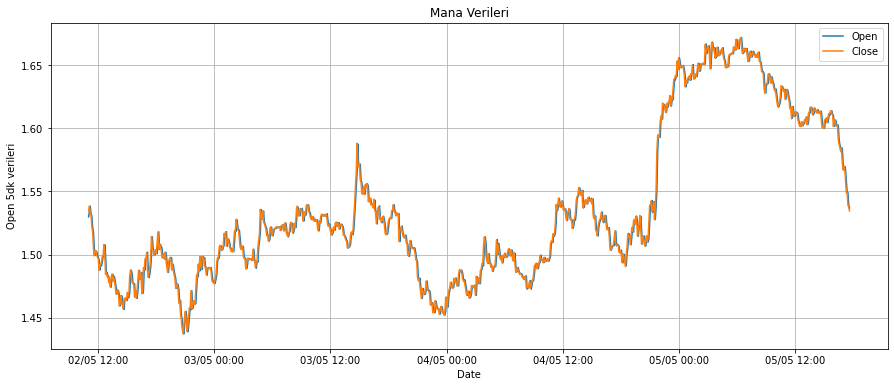

In [9]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title="Mana Verileri")


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

pyplot.plot(data['date'][:945], data['open'][:945], label = "Open")
pyplot.plot(data['date'][:945], data['close'][:945], label = "Close")

pyplot.legend()
pyplot.grid()

pyplot.show()


In [10]:
def analyze_data_collect(analyze='RSI',symbol = 'MANA',market = 'USD',interval='5min'):
    api_key = 'VKYYBU3O19HP6199'

    url = f'https://www.alphavantage.co/query?function={analyze}&symbol={symbol}{market}&interval={interval}&time_period=10&series_type=open&apikey={api_key}'
                                             #function=EMA&symbol=USDEUR&interval=weekly&time_period=10&series_type=open&apikey=demo
    r = requests.get(url)
    data_raw = r.json()
    print('symbol: ', analyze , f'\n {symbol} Data Collected')
    
    
    data_col = {f"{analyze}": [], "date": []}
        
    for index, item in enumerate(data_raw[f"Technical Analysis: {analyze}"]):
        
        data_col["date"].append(datetime.datetime.strptime(item.replace('-','/'),'%Y/%m/%d %H:%M')+timedelta(hours=3))
        data_col[f"{analyze}"].append(float(data_raw[f"Technical Analysis: {analyze}"][item][f'{analyze}']))
        

    return (data_col, data_raw)
    


In [11]:
rsi_data, raw_data = analyze_data_collect('RSI')
sma_data, raw2_data = analyze_data_collect('SMA')
t3_data, raw3_data = analyze_data_collect('T3')
mom_data, raw4_data = analyze_data_collect('MOM')

symbol:  RSI 
 MANA Data Collected
symbol:  SMA 
 MANA Data Collected
symbol:  T3 
 MANA Data Collected
symbol:  MOM 
 MANA Data Collected


In [12]:

all_analyze ={'RSI': rsi_data['RSI'][:945],'SMA': sma_data['SMA'][:945],'T3': t3_data['T3'][:945], 'MOM': mom_data['MOM'][:945]}
print('rsi len:',len(all_analyze['RSI']))
print('sma len:',len(all_analyze['SMA']))
print('t3 len:',len(all_analyze['T3']))
print('mom len:',len(all_analyze['MOM']))
pandas.DataFrame(all_analyze, index = rsi_data['date'][:945])

rsi len: 945
sma len: 945
t3 len: 945
mom len: 945


,RSI,SMA,T3,MOM
2022-05-05 13:40:00,10.5360,1.5596,1.5638,-0.0446
2022-05-05 13:35:00,11.0952,1.5640,1.5686,-0.0454
2022-05-05 13:30:00,13.7835,1.5686,1.5731,-0.0380
2022-05-05 13:25:00,13.9386,1.5724,1.5774,-0.0421
2022-05-05 13:20:00,17.3461,1.5766,1.5814,-0.0433
...,...,...,...,...
2022-05-02 07:20:00,36.6772,1.5378,1.5391,-0.0133
2022-05-02 07:15:00,38.1835,1.5392,1.5403,-0.0099
2022-05-02 07:10:00,45.8021,1.5402,1.5413,-0.0073
2022-05-02 07:05:00,38.4314,1.5409,1.5422,-0.0124


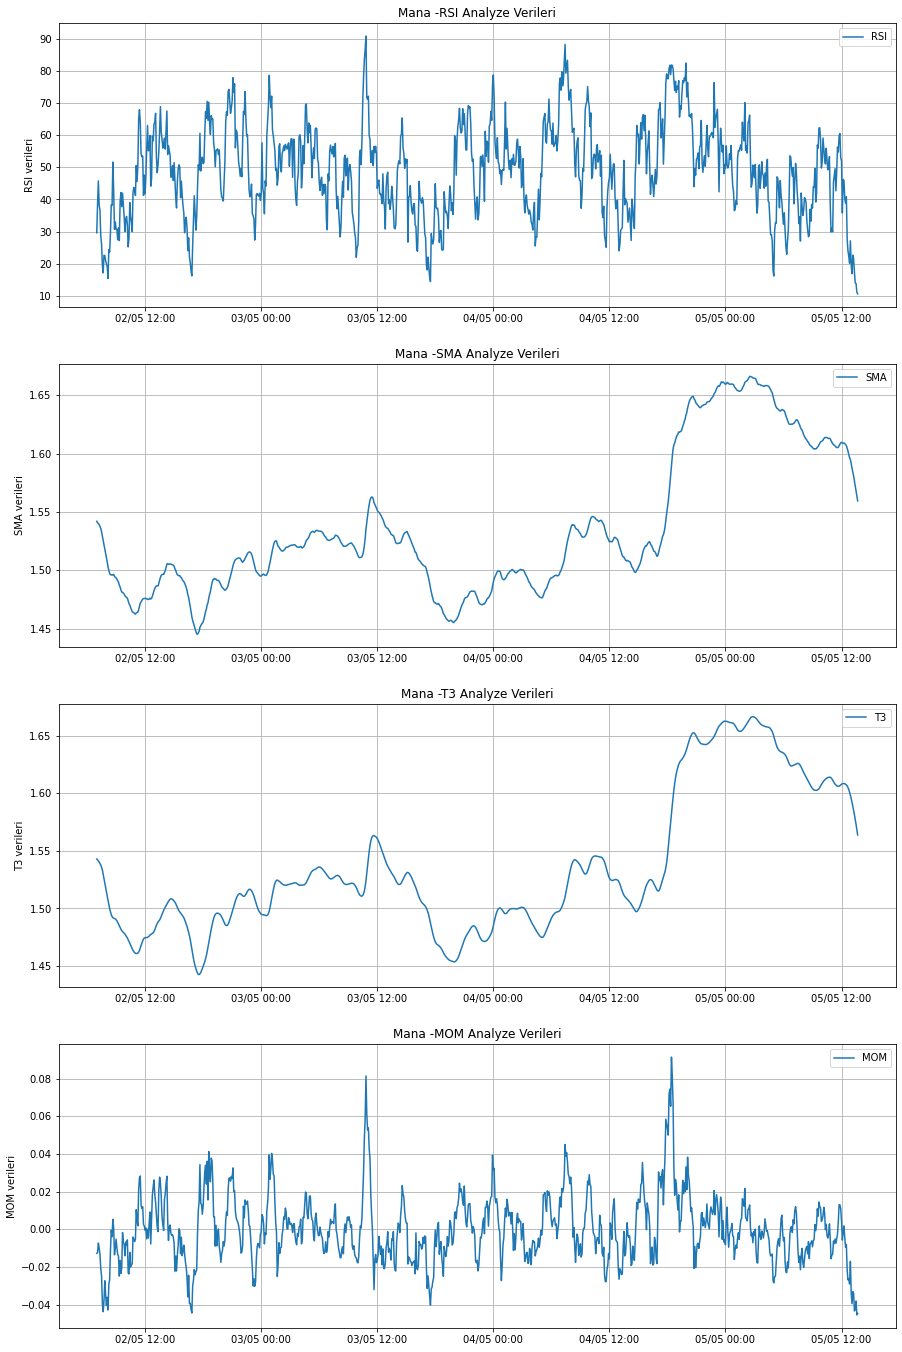

In [13]:
leng=len(all_analyze)
fig =pyplot.figure(figsize = (15,24))
for i in range(leng):
    sub_number = int(f'{leng}1{i+1}')
    names = list(all_analyze.items())
    
    ax = fig.add_subplot(sub_number)
    ax.set( 
       ylabel=f"{names[i][0]} verileri",
       title=f"Mana -{names[i][0]} Analyze Verileri")
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
    
    pyplot.plot(rsi_data['date'][:945], all_analyze[f'{names[i][0]}'], label = f"{names[i][0]}")

    pyplot.legend()
    pyplot.grid()
#     pyplot.xticks(rotation=45, ha='right') #for rotated dates at x axis
    

**Candle Graph**

In [14]:
# fig = pyplot.figure(figsize=(15,24))
# ax=fig.add_subplot(511)
# ax.set( 
#        ylabel="Open 5dk verileri",
#        title="Mana Verileri")

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# pyplot.plot(data['date'], data['open'], label = "Open")
# pyplot.plot(data['date'], data['close'], label = "Close")

# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(512)
# ax.set(xlabel="Date", 
#        ylabel="RSI verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(rsi_data['date'],rsi_data['RSI'],label ="RSI")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(515)
# ax.set(xlabel="Date", 
#        ylabel="SMA verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(sma_data['date'],sma_data['SMA'][:991],label ="SMA")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(514)
# ax.set(xlabel="Date", 
#        ylabel="T3 verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(t3_data['date'],t3_data['T3'],label ="T3")
# pyplot.legend()
# pyplot.grid()

# ax = fig.add_subplot(513)
# ax.set(xlabel="Date", 
#        ylabel="MOM verileri",
#        )

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))

# pyplot.plot(mom_data['date'],mom_data['MOM'],label ="MOM")
# pyplot.legend()
# pyplot.grid()

# pyplot.show()

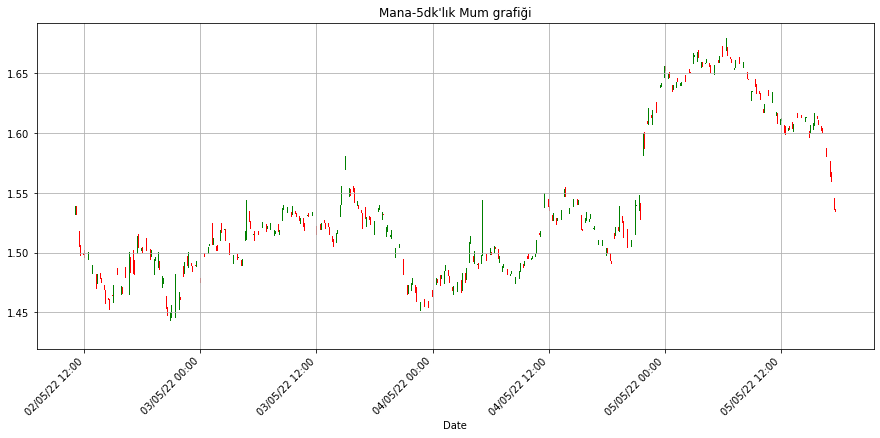

In [15]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       title="Mana-5dk'lık Mum grafiği")

width = 0.0015
width2 = 0.001

up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

col1 = 'green'
col2 = 'red'

pyplot.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
pyplot.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
pyplot.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

pyplot.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
pyplot.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
pyplot.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y %H:%M'))

pyplot.xticks(rotation=45, ha='right')
pyplot.grid()

pyplot.show()


**Date datasını 0'dan başlatınca daha mantıklı regression yapıyor.**

In [27]:
for index,date in enumerate(data['date']):
#     y=date.year
#     m=date.month + y*12
#     d=date.day + m*30
#     h=date.hour + d*24
#     m=date.minute + h*60
#     date = m
    data['date'][index]=index*5  
    
data_train, data_test, data_check = {}, {}, {}
    
for i in data:
    data_train[i] = data[i][:900]
    data_check[i]= data[i][900:]
print('data_train :',len(data_train['open']))
print('data_check :',len(data_check['open']))

data_train : 900
data_check : 45


**Polynomial Regression With scikit-learn**

In [28]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array(data_train['date']).reshape((-1,1))
y= np.array(data_train['open']).reshape((-1,1))



**Finding Optimum Degree**

In [29]:
def find_optimum_degree(x=x,y=y):
    degree_num = 1
    error_r =[]
    error_degree = []
    for i in range(20):
        degree_num = i+1
        x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x)
        model = LinearRegression().fit(x_, y)
        r_sq = model.score(x_, y)
        print(f'Degree {degree_num} coefficient of determination:', r_sq)
#         print(f'Degree {degree_num} intercept:', model.intercept_)
#         print(f'Degree {degree_num} coefficients:', model.coef_)
        error_r.append(r_sq)
        error_degree.append(i)
        
    print('************************')
    print(f'Max r value is {max(error_r)}, so that optimum degree is {error_r.index(max(error_r))+1}')
    print('************************')
    
    fig, ax = pyplot.subplots(figsize=(15, 6))

    ax.set(xlabel="Degree",
           ylabel="R value",
           title="Error Verileri")

    pyplot.plot(error_degree, error_r, label = "Error")
    


    pyplot.legend()
    pyplot.grid()

    pyplot.show()
    degree_return = error_r.index(max(error_r))+1
    
    return degree_return

In [123]:
def find_optimum_degree2(x=x,y=y):
    degree_num = 1
    error_r =[0,0]
    error_degree = [0,0]
    r_sq =0
    degree_num = 0
    start = True
    while start:
        if error_r[degree_num+1]<error_r[degree_num]:
            break   
        else:        
            degree_num +=1
            x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x)
            model = LinearRegression().fit(x_, y)
            r_sq = model.score(x_, y)
            print(f'Degree {degree_num} coefficient of determination:', r_sq)
#         print(f'Degree {degree_num} intercept:', model.intercept_)
#         print(f'Degree {degree_num} coefficients:', model.coef_)
            error_r.append(r_sq)
            error_degree.append(degree_num)
        
    print('************************')
    print(f'Max r value is {max(error_r)}, so that optimum degree is {error_r.index(max(error_r))+1}')
    print('************************')
    
    fig, ax = pyplot.subplots(figsize=(15, 6))

    ax.set(xlabel="Degree",
           ylabel="R value",
           title="Error Verileri")

    pyplot.plot(error_degree, error_r, label = "Error")
    


    pyplot.legend()
    pyplot.grid()

    pyplot.show()
    degree_return = error_r.index(max(error_r))+1
    
    return degree_return

Degree 1 coefficient of determination: 0.5315748393725832
Degree 2 coefficient of determination: 0.6159778571647061
Degree 3 coefficient of determination: 0.6159780504074379
Degree 4 coefficient of determination: 0.7935147099044371
Degree 5 coefficient of determination: 0.7254269475162768
************************
Max r value is 0.7935147099044371, so that optimum degree is 6
************************


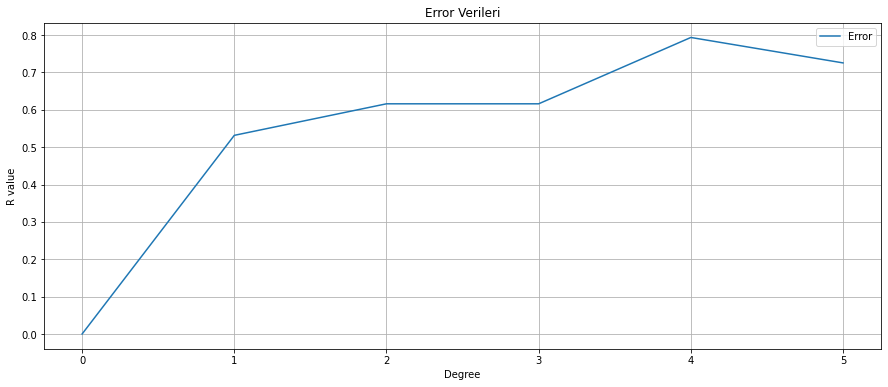

In [124]:
optimum_degree = find_optimum_degree2()

Degree 1 coefficient of determination: 0.5315748393725832
Degree 2 coefficient of determination: 0.6159778571647061
Degree 3 coefficient of determination: 0.6159780504074379
Degree 4 coefficient of determination: 0.7935147099044371
Degree 5 coefficient of determination: 0.7254269475162768
Degree 6 coefficient of determination: 0.7815778440357799
Degree 7 coefficient of determination: 0.8057226916661859
Degree 8 coefficient of determination: 0.7440008174217991
Degree 9 coefficient of determination: 0.6342479147259613
Degree 10 coefficient of determination: 0.5182507421193949
Degree 11 coefficient of determination: 0.41871165044058045
Degree 12 coefficient of determination: 0.34270509914609726
Degree 13 coefficient of determination: 0.28885617350519477
Degree 14 coefficient of determination: 0.2525647112179792
Degree 15 coefficient of determination: 0.22886309655460235
Degree 16 coefficient of determination: 0.21361490342289802
Degree 17 coefficient of determination: 0.2037927590381946
D

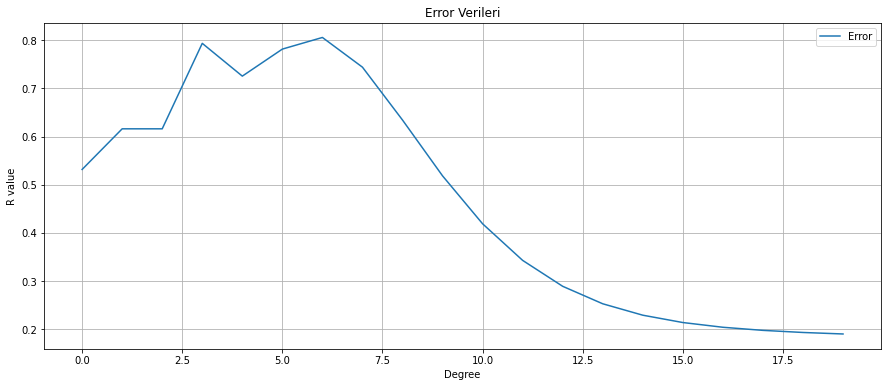

In [125]:
optimum_degree = find_optimum_degree()

In [126]:
degree_num = optimum_degree

x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x)

In [127]:
model = LinearRegression().fit(x_, y)

In [128]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8057226916661859
intercept: [1.63241233]
coefficients: [[-3.85448584e-23  2.82252074e-17 -8.92016774e-17 -7.13099398e-14
   5.46325950e-17 -1.40747132e-20  1.20933514e-24]]


In [129]:
x_2 = np.array(data_check['date']).reshape((-1,1))
x_2 = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_2)
y_pred = model.predict(x_2)
y_train = model.predict(x_)

y_all = []

for yt in y_train:
    y_all.append(yt[0])
for yp in y_pred:
    y_all.append(yp[0])


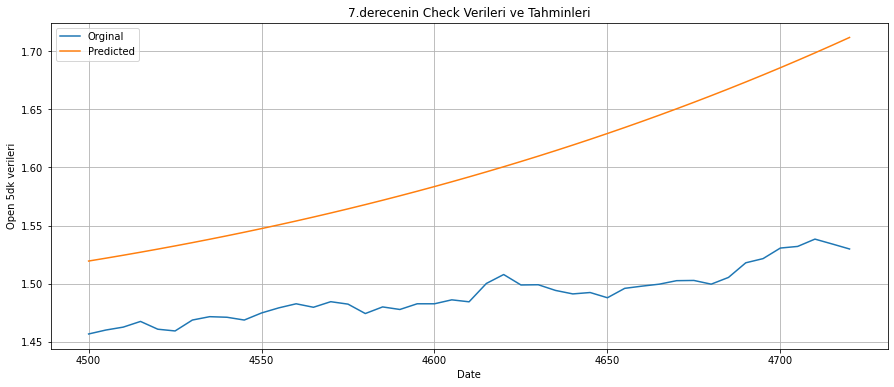

In [130]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.derecenin Check Verileri ve Tahminleri")

pyplot.plot(data_check['date'], data_check['open'], label = "Orginal")
pyplot.plot(data_check['date'], y_pred, label = "Predicted")


pyplot.legend()
pyplot.grid()

pyplot.show()

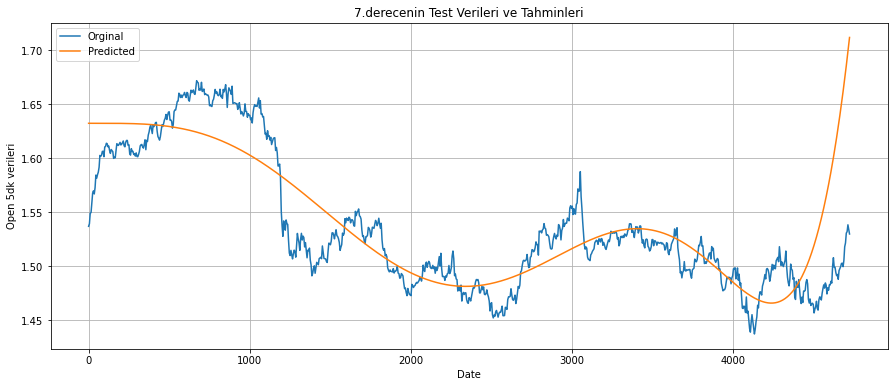

In [131]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.derecenin Test Verileri ve Tahminleri")

pyplot.plot(data['date'], data['open'], label = "Orginal")
pyplot.plot(data['date'], y_all, label = "Predicted")


pyplot.legend()
pyplot.grid()

pyplot.show()

In [132]:
x_ = PolynomialFeatures(degree=degree_num+1, include_bias=False).fit_transform(x)

model = LinearRegression().fit(x_, y)

x_3 = np.array(data_check['date']).reshape((-1,1))
x_3 = PolynomialFeatures(degree=degree_num+1, include_bias=False).fit_transform(x_3)
y_pred2_up = model.predict(x_3)

y_pred_ort=[]
for index,item in enumerate(y_pred2):
    y_pred_ort.append([np.sqrt(item[0] * y_pred2_up[index][0])])


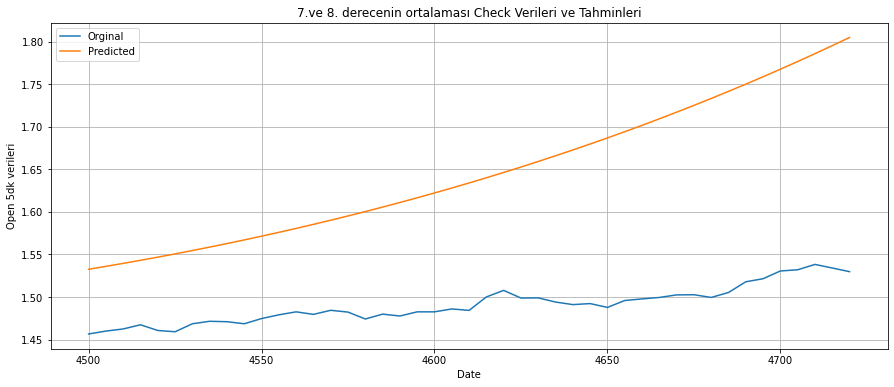

In [133]:
fig, ax = pyplot.subplots(figsize=(15, 6))

ax.set(xlabel="Date", 
       ylabel="Open 5dk verileri",
       title=f"{degree_num}.ve {degree_num+1}. derecenin ortalaması Check Verileri ve Tahminleri")

pyplot.plot(data_check['date'], data_check['open'], label = "Orginal")
pyplot.plot(data_check['date'], y_pred_ort, label = "Predicted")


pyplot.legend()
pyplot.grid()

pyplot.show()

**5 Parçaya Bölüp Regression Yaptırınca**

In [134]:
data_train_sliced = {}
# cut should be divide 945 without remaning
cut =15
tr = int((945/cut)*0.8)
pr = int(945/cut-tr)
print('train data lenth of each slice: ',tr)
print('predict data lenth of each slice: ',pr)


for j in range(cut):
    data_train_sliced[f'slice_train{j}'] = {}
    data_train_sliced[f'slice_test{j}'] = {}
    a=0
    b=0
    for i in data:   
        a =tr*(j)+(pr*(j))
        c=tr*(j+1)+(pr*(j))
        b =tr*(j+1)+(pr*(j+1))
          
        data_train_sliced[f'slice_train{j}'][i] = data[i][a:c]
        data_train_sliced[f'slice_test{j}'][i] = data[i][c:b]
    

train data lenth of each slice:  50
predict data lenth of each slice:  13


In [135]:
# print(data_train_sliced['slice_train3']['date'])
print(len(data_train_sliced))
for i in data_train_sliced:
    print(i)
    


30
slice_train0
slice_test0
slice_train1
slice_test1
slice_train2
slice_test2
slice_train3
slice_test3
slice_train4
slice_test4
slice_train5
slice_test5
slice_train6
slice_test6
slice_train7
slice_test7
slice_train8
slice_test8
slice_train9
slice_test9
slice_train10
slice_test10
slice_train11
slice_test11
slice_train12
slice_test12
slice_train13
slice_test13
slice_train14
slice_test14


In [149]:
def sliced_reg():
    y_all=[]
    
    for i in range(int(len(data_train_sliced)/2)):
        
        x_slice = np.array(data_train_sliced[f'slice_train{i}']['date']).reshape((-1,1))
        y_slice = np.array(data_train_sliced[f'slice_train{i}']['open']).reshape((-1,1))
        

        degree_num = 1
        error_r =[]
        error_degree = []
        for ip in range(33):
            degree_num = ip+1
            x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_slice)
            model = LinearRegression().fit(x_, y_slice)
            r_sq = model.score(x_, y_slice)
            print(f'Degree {degree_num} coefficient of determination:', r_sq)
#         print(f'Degree {degree_num} intercept:', model.intercept_)
#         print(f'Degree {degree_num} coefficients:', model.coef_)
            error_r.append(r_sq)
            error_degree.append(ip)
        
        print('************************')
        print(f'Max r value is {max(error_r)}, so that optimum degree is {error_r.index(max(error_r))+1}')
        print('************************')
    
        fig, ax = pyplot.subplots(figsize=(15, 6))

        ax.set(xlabel="Degree",
               ylabel="R value",
               title="Error Verileri")

        pyplot.plot(error_degree, error_r, label = "Error")
    


        pyplot.legend()
        pyplot.grid()

        pyplot.show()
        optimum_degree_sliced = error_r.index(max(error_r))+1
        
        
        
        degree_num = optimum_degree_sliced

        x_ = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_slice)
        model = LinearRegression().fit(x_, y_slice)

        r_sq = model.score(x_, y_slice)
        print('coefficient of determination:', r_sq)
        print('intercept:', model.intercept_)
        print('coefficients:', model.coef_)
        
        print(f'slice_test{i}')

        x_2_slice = np.array(data_train_sliced[f'slice_test{i}']['date']).reshape((-1,1))      
        x_2_slice = PolynomialFeatures(degree=degree_num, include_bias=False).fit_transform(x_2_slice)
        y_pred = model.predict(x_2_slice)
        y_trained = model.predict(x_)
        
        for yt in y_trained:
            y_all.append(yt[0])
        for yp in y_pred:
            y_all.append(yp[0])


        fig, ax = pyplot.subplots(figsize=(15, 6))

        ax.set(xlabel="Date", 
               ylabel="Open 5dk verileri",
               title=f"{degree_num}.derecenin Test Verileri ve Tahminleri")

        pyplot.plot(data_train_sliced[f'slice_test{i}']['date'], data_train_sliced[f'slice_test{i}']['open'], label = "Orginal")
        pyplot.plot(data_train_sliced[f'slice_test{i}']['date'], y_pred, label = "Predicted")


        pyplot.legend()
        pyplot.grid()

        pyplot.show()
    fig, ax = pyplot.subplots(figsize=(15, 6))

    ax.set(xlabel="Date", 
            ylabel="Open 5dk verileri",
            title=f"{degree_num}.derecenin Test Verileri ve Tahminleri")

    pyplot.plot(data['date'], data['open'], label = "Orginal")
    pyplot.plot(data['date'], y_all, label = "Predicted")


    pyplot.legend()
    pyplot.grid()

    pyplot.show()
        
        

Degree 1 coefficient of determination: 0.6730888865058169
Degree 2 coefficient of determination: 0.9015549262976357
Degree 3 coefficient of determination: 0.9628179544679043
Degree 4 coefficient of determination: 0.96304748394954
Degree 5 coefficient of determination: 0.9737249231870863
Degree 6 coefficient of determination: 0.9739652469763479
Degree 7 coefficient of determination: 0.9701266340126866
Degree 8 coefficient of determination: 0.9583926661191886
Degree 9 coefficient of determination: 0.9368325606610814
Degree 10 coefficient of determination: 0.9003572396368024
Degree 11 coefficient of determination: 0.6185175914557177
Degree 12 coefficient of determination: 0.5325393294194548
Degree 13 coefficient of determination: 0.4655344013406998
Degree 14 coefficient of determination: 0.4159206675151834
Degree 15 coefficient of determination: 0.37998792510181223
Degree 16 coefficient of determination: 0.35391980348003493
Degree 17 coefficient of determination: 0.33462089174048393
Degre

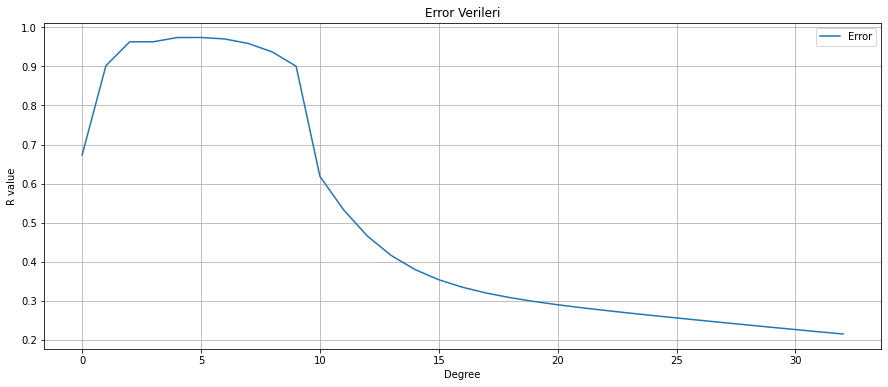

coefficient of determination: 0.9739652469763479
intercept: [1.53744719]
coefficients: [[ 8.91434247e-04  5.59140385e-06 -1.06162978e-07  2.15115424e-10
   1.47936065e-12 -4.62342516e-15]]
slice_test0


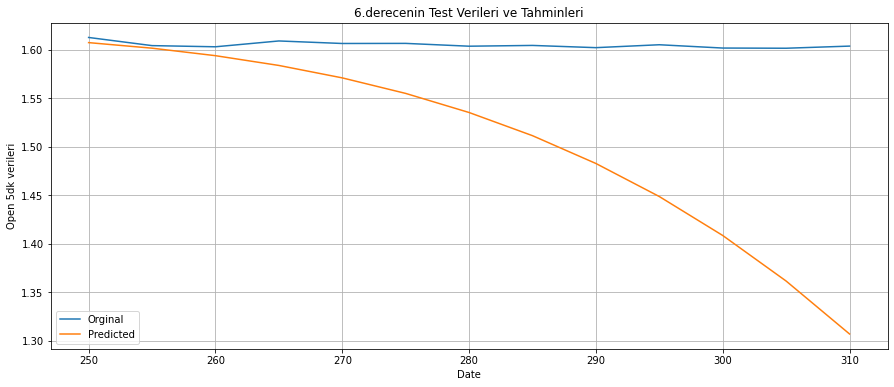

Degree 1 coefficient of determination: 0.779443598113302
Degree 2 coefficient of determination: 0.7812260143707481
Degree 3 coefficient of determination: 0.8209466894377588
Degree 4 coefficient of determination: 0.8254372051905413
Degree 5 coefficient of determination: 0.8256083636023243
Degree 6 coefficient of determination: 0.8264338472507723
Degree 7 coefficient of determination: 0.8281351398697419
Degree 8 coefficient of determination: 0.8305909525166039
Degree 9 coefficient of determination: 0.8335430844898569
Degree 10 coefficient of determination: 0.836553986187618
Degree 11 coefficient of determination: 0.839092259457136
Degree 12 coefficient of determination: 0.8406237667917486
Degree 13 coefficient of determination: 0.8407088043767266
Degree 14 coefficient of determination: 0.8390956403159479
Degree 15 coefficient of determination: 0.8357278741898795
Degree 16 coefficient of determination: 0.830745221085193
Degree 17 coefficient of determination: 0.8007632599868643
Degree 18 

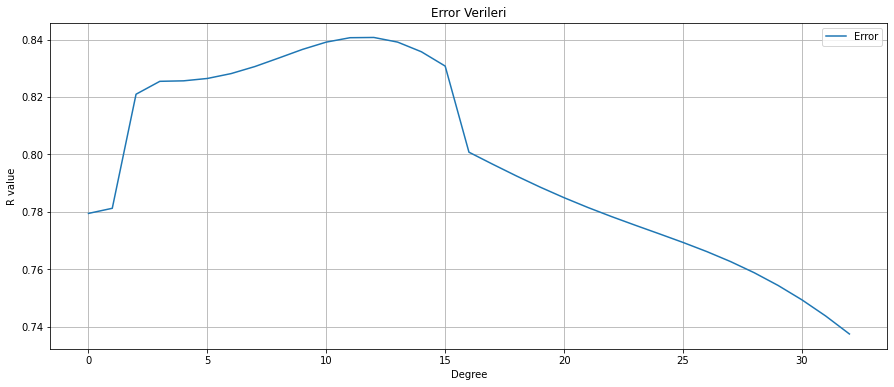

coefficient of determination: 0.8407088043767266
intercept: [1.57583041]
coefficients: [[ 1.46636897e-42 -1.65934133e-24 -1.74430939e-28 -1.79279360e-32
   3.62336806e-32  9.55903810e-30  2.11465472e-27  3.58660643e-25
   3.61481671e-23 -2.78352041e-25  8.09660998e-28 -1.05222886e-30
   5.14748976e-34]]
slice_test1


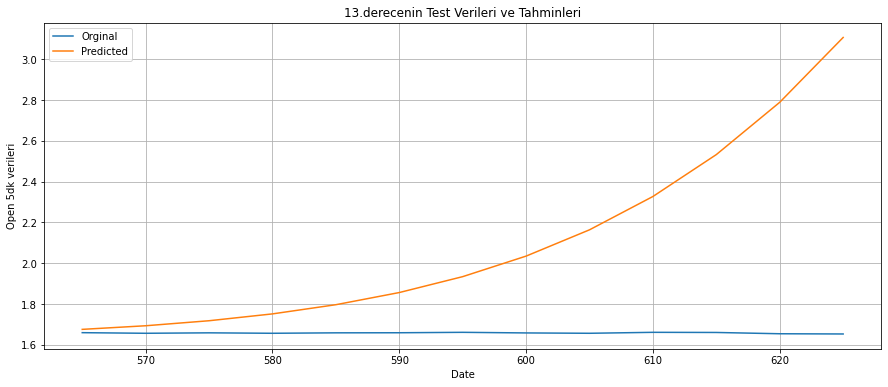

Degree 1 coefficient of determination: 0.056551473753453374
Degree 2 coefficient of determination: 0.14304925329166562
Degree 3 coefficient of determination: 0.21977689043884374
Degree 4 coefficient of determination: 0.40031867418034095
Degree 5 coefficient of determination: 0.39811065475237006
Degree 6 coefficient of determination: 0.39264248566611504
Degree 7 coefficient of determination: 0.38393673966981423
Degree 8 coefficient of determination: 0.37221264651523234
Degree 9 coefficient of determination: 0.35787342052982407
Degree 10 coefficient of determination: 0.3414830704127686
Degree 11 coefficient of determination: 0.32373273373346956
Degree 12 coefficient of determination: 0.30539906108626136
Degree 13 coefficient of determination: 0.28729747468872935
Degree 14 coefficient of determination: 0.2702334475486843
Degree 15 coefficient of determination: 0.254955047943921
Degree 16 coefficient of determination: 0.24210986478853025
Degree 17 coefficient of determination: 0.2322090820

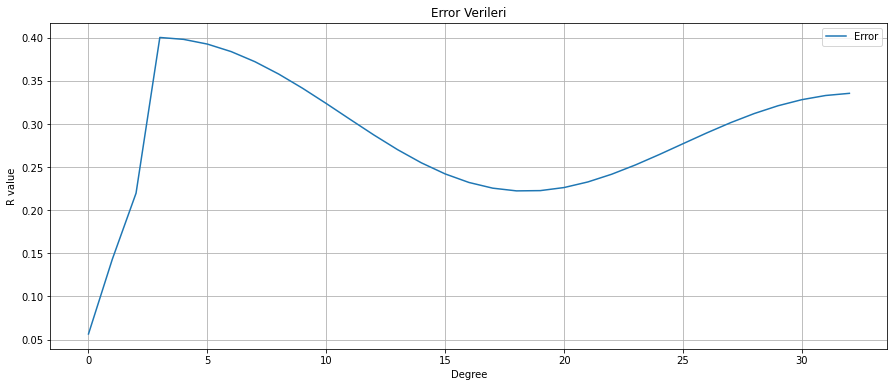

coefficient of determination: 0.40031867418034095
intercept: [-40.59065012]
coefficients: [[ 2.24907911e-01 -4.46660731e-04  3.92285601e-07 -1.28578822e-10]]
slice_test2


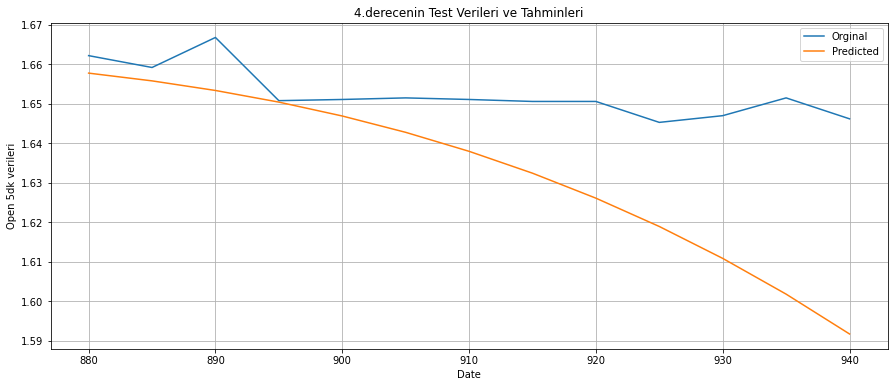

Degree 1 coefficient of determination: 0.6662888896524459
Degree 2 coefficient of determination: 0.8772352958691529
Degree 3 coefficient of determination: 0.8776081114899907
Degree 4 coefficient of determination: 0.8828068364693848
Degree 5 coefficient of determination: 0.8818490941755873
Degree 6 coefficient of determination: 0.8809425510089599
Degree 7 coefficient of determination: 0.8801268694027677
Degree 8 coefficient of determination: 0.8794448606122234
Degree 9 coefficient of determination: 0.8789354406553384
Degree 10 coefficient of determination: 0.8786329112519874
Degree 11 coefficient of determination: 0.8785653876017462
Degree 12 coefficient of determination: 0.8787534728476292
Degree 13 coefficient of determination: 0.8792092323811196
Degree 14 coefficient of determination: 0.8799355082577058
Degree 15 coefficient of determination: 0.8809255996931395
Degree 16 coefficient of determination: 0.8821633204909727
Degree 17 coefficient of determination: 0.8836234289331346
Degree

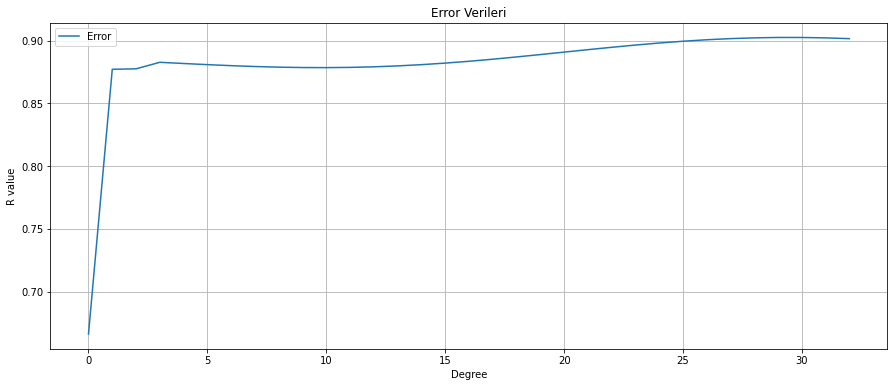

coefficient of determination: 0.9025982356602056
intercept: [1.63004155]
coefficients: [[ 6.26729824e-084 -4.59780682e-085  1.94987877e-088  1.03885072e-092
   7.36819502e-154  5.65498825e-142  6.17775741e-139  6.57858746e-136
   6.85779018e-133  7.01649260e-130  7.05684046e-127  6.98221720e-124
   6.79747453e-121  6.50916845e-118  6.12579144e-115  5.65798742e-112
   5.11873133e-109  4.52344775e-106  3.89003516e-103  3.23875087e-100
   2.59189805e-097  1.97323867e-094  1.40703404e-091  9.16586746e-089
   5.22123431e-086  2.37814221e-083  6.76709997e-081 -1.76227812e-083
   1.52924585e-086 -4.42220503e-090]]
slice_test3


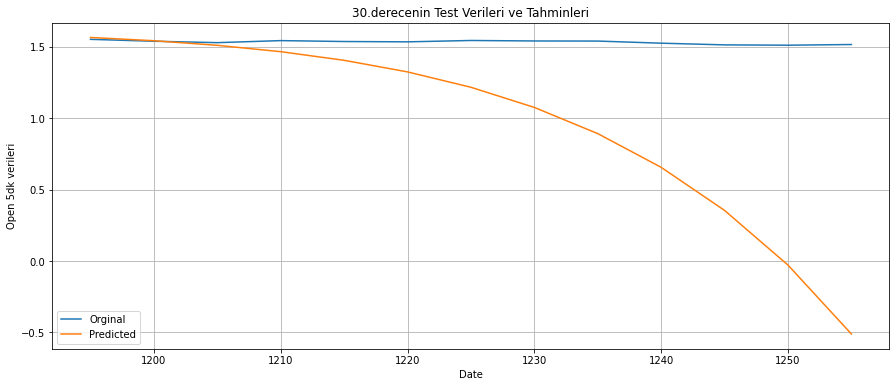

Degree 1 coefficient of determination: 0.07672508270033218
Degree 2 coefficient of determination: 0.1828626266904425
Degree 3 coefficient of determination: 0.5622056728351241
Degree 4 coefficient of determination: 0.651619728534115
Degree 5 coefficient of determination: 0.653309700118722
Degree 6 coefficient of determination: 0.654595752820074
Degree 7 coefficient of determination: 0.6552524153183332
Degree 8 coefficient of determination: 0.655225265934513
Degree 9 coefficient of determination: 0.6544305511990375
Degree 10 coefficient of determination: 0.6527974577026572
Degree 11 coefficient of determination: 0.650269654515998
Degree 12 coefficient of determination: 0.646806540836693
Degree 13 coefficient of determination: 0.6423841769567911
Degree 14 coefficient of determination: 0.6369958795764203
Degree 15 coefficient of determination: 0.6306524703629885
Degree 16 coefficient of determination: 0.6233821732328302
Degree 17 coefficient of determination: 0.6152301644776135
Degree 18 c

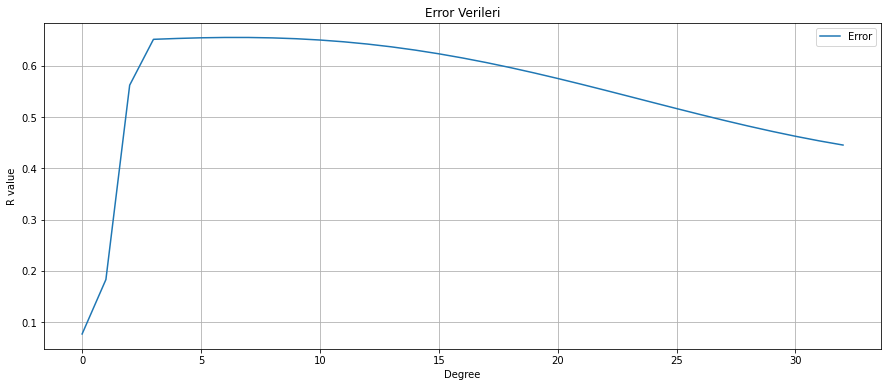

coefficient of determination: 0.6552524153183332
intercept: [-20.91952421]
coefficients: [[ 3.89262948e-19  1.17584937e-15  4.44739924e-13  2.04797601e-10
  -3.49694516e-13  2.06965626e-16 -4.19248589e-20]]
slice_test4


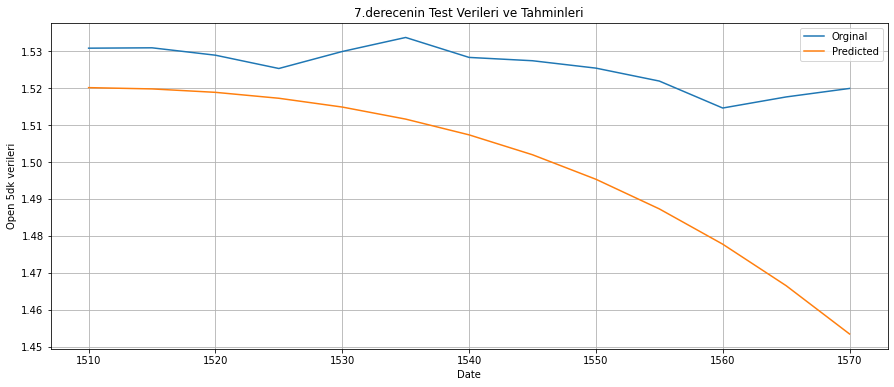

Degree 1 coefficient of determination: 0.06949818235232785
Degree 2 coefficient of determination: 0.06985583892637826
Degree 3 coefficient of determination: 0.290057551685195
Degree 4 coefficient of determination: 0.425845964509985
Degree 5 coefficient of determination: 0.4326200165208465
Degree 6 coefficient of determination: 0.4432434832473118
Degree 7 coefficient of determination: 0.45238583222578843
Degree 8 coefficient of determination: 0.4617321749730048
Degree 9 coefficient of determination: 0.47120835889204604
Degree 10 coefficient of determination: 0.4807368311741228
Degree 11 coefficient of determination: 0.4902375081605612
Degree 12 coefficient of determination: 0.49962866071473067
Degree 13 coefficient of determination: 0.5088278270775186
Degree 14 coefficient of determination: 0.5177527436976445
Degree 15 coefficient of determination: 0.5263222768078171
Degree 16 coefficient of determination: 0.5344573358123079
Degree 17 coefficient of determination: 0.5420818653681662
Deg

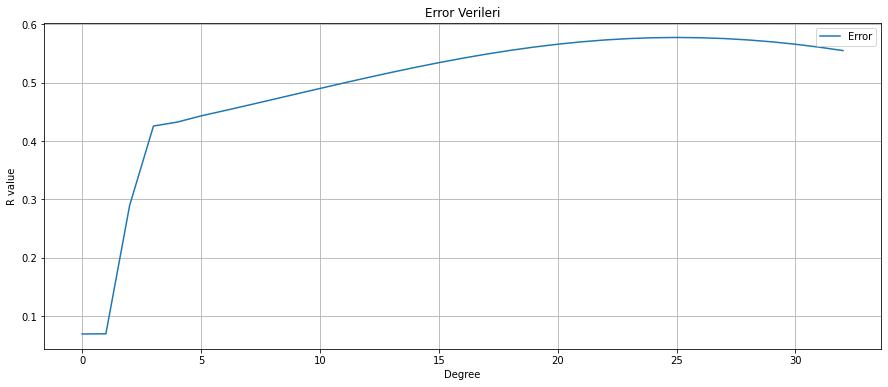

coefficient of determination: 0.5776719045464731
intercept: [1.35614058]
coefficients: [[ 3.89126006e-075 -6.90262803e-075 -8.86853130e-082  5.01458087e-084
   1.46885609e-137  7.66508257e-125  1.29138013e-121  2.11251577e-118
   3.36801746e-115  5.24359500e-112  7.97770529e-109  1.18577792e-105
   1.71984917e-102  2.42887244e-099  3.32900370e-096  4.40693568e-093
   5.59590891e-090  6.74713829e-087  7.60687371e-084  7.82308309e-081
   7.02550548e-078  5.03833655e-075  2.25467068e-072 -3.76543961e-075
   2.09826340e-078 -3.90089979e-082]]
slice_test5


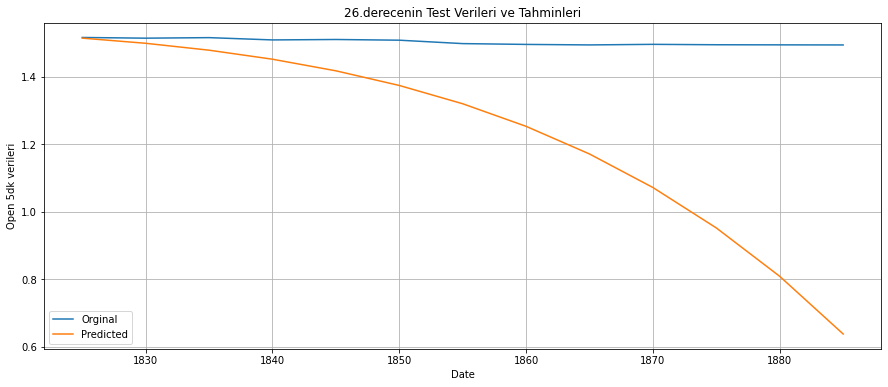

Degree 1 coefficient of determination: 0.10264864494307313
Degree 2 coefficient of determination: 0.6991747632815792
Degree 3 coefficient of determination: 0.754563630420788
Degree 4 coefficient of determination: 0.8794327170287052
Degree 5 coefficient of determination: 0.8772322199449538
Degree 6 coefficient of determination: 0.8758945938344085
Degree 7 coefficient of determination: 0.8740035936406692
Degree 8 coefficient of determination: 0.8720554452045358
Degree 9 coefficient of determination: 0.8700687894660792
Degree 10 coefficient of determination: 0.8680624422518215
Degree 11 coefficient of determination: 0.8660552211423886
Degree 12 coefficient of determination: 0.8640657404003037
Degree 13 coefficient of determination: 0.8621122487111553
Degree 14 coefficient of determination: 0.860212440505985
Degree 15 coefficient of determination: 0.8583832495137101
Degree 16 coefficient of determination: 0.8566407280038892
Degree 17 coefficient of determination: 0.8549998905368823
Degree 

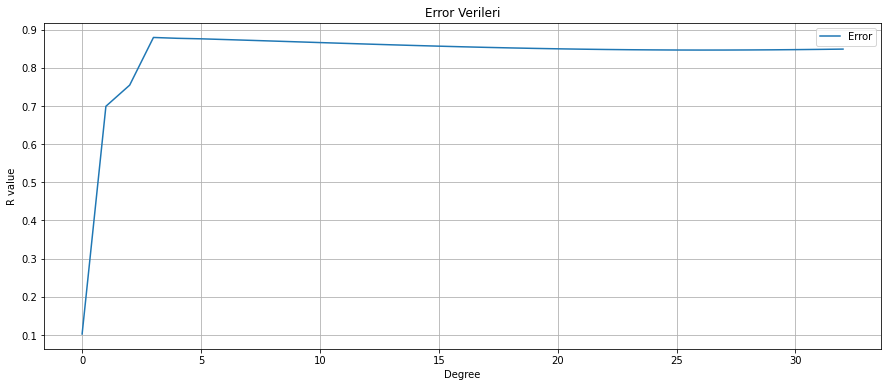

coefficient of determination: 0.8794327170287052
intercept: [-2772.73005365]
coefficients: [[ 5.55845867e+00 -4.17245343e-03  1.39071046e-06 -1.73661249e-10]]
slice_test6


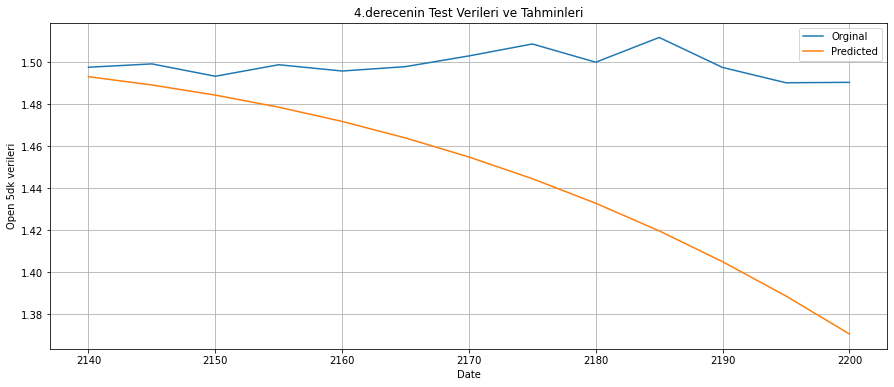

Degree 1 coefficient of determination: 0.30153659214536743
Degree 2 coefficient of determination: 0.43843336368945696
Degree 3 coefficient of determination: 0.5260855983406756
Degree 4 coefficient of determination: 0.5203646980614158
Degree 5 coefficient of determination: 0.514916148582858
Degree 6 coefficient of determination: 0.5097641728018137
Degree 7 coefficient of determination: 0.7738143836299856
Degree 8 coefficient of determination: 0.7742649588508722
Degree 9 coefficient of determination: 0.7743595404497596
Degree 10 coefficient of determination: 0.774090500988783
Degree 11 coefficient of determination: 0.7734520186412954
Degree 12 coefficient of determination: 0.7724413597292901
Degree 13 coefficient of determination: 0.7710559243067354
Degree 14 coefficient of determination: 0.7692963632812609
Degree 15 coefficient of determination: 0.7671695751737615
Degree 16 coefficient of determination: 0.7646757889621392
Degree 17 coefficient of determination: 0.7618239101057567
Degree

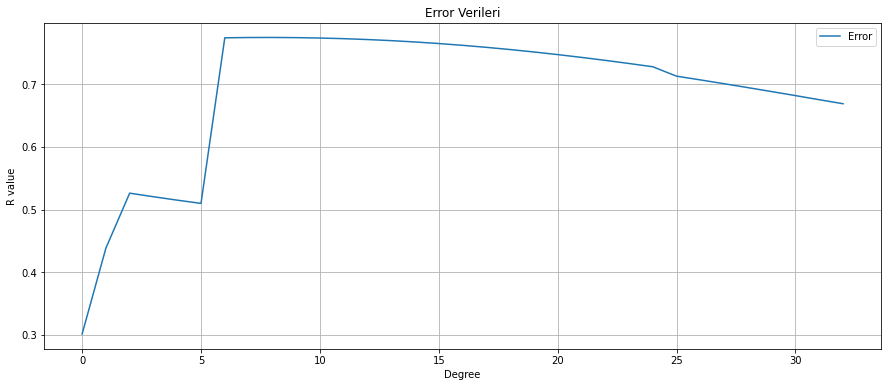

coefficient of determination: 0.7743595404497596
intercept: [-73.00818516]
coefficients: [[ 5.33261971e-33 -1.14808018e-21  1.10988688e-24  4.79588146e-23
   5.58150625e-20  3.89850893e-17 -4.29220202e-20  1.60720277e-23
  -2.03684612e-27]]
slice_test7


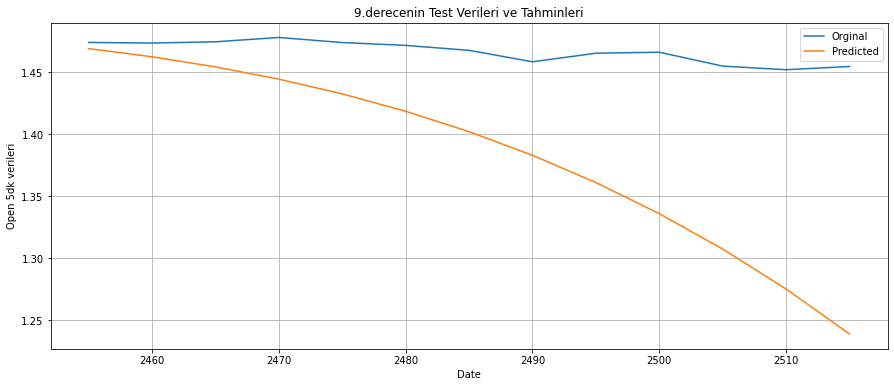

Degree 1 coefficient of determination: 0.899701094445655
Degree 2 coefficient of determination: 0.9228824983399064
Degree 3 coefficient of determination: 0.9335539096050604
Degree 4 coefficient of determination: 0.9337858898426571
Degree 5 coefficient of determination: 0.9340173204278255
Degree 6 coefficient of determination: 0.9342468442612655
Degree 7 coefficient of determination: 0.9344731389940725
Degree 8 coefficient of determination: 0.9346949264438414
Degree 9 coefficient of determination: 0.9349109815509888
Degree 10 coefficient of determination: 0.9351201408305068
Degree 11 coefficient of determination: 0.9353213102693236
Degree 12 coefficient of determination: 0.9355134726280734
Degree 13 coefficient of determination: 0.935695694104231
Degree 14 coefficient of determination: 0.9358671303217954
Degree 15 coefficient of determination: 0.936027031617727
Degree 16 coefficient of determination: 0.9361747475961529
Degree 17 coefficient of determination: 0.9363097309301958
Degree 18

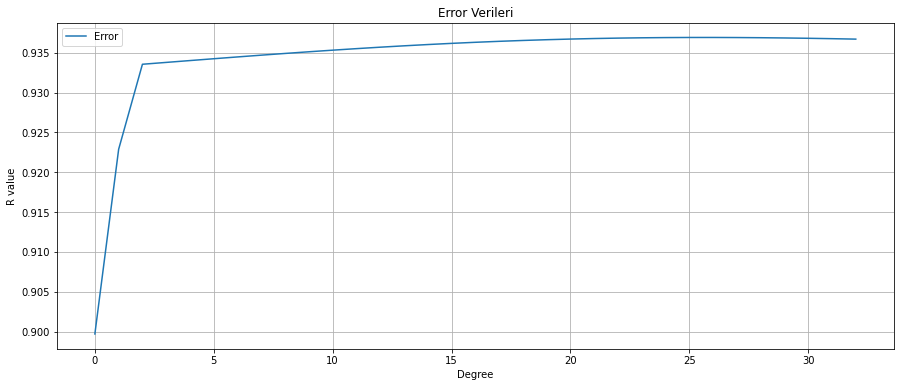

coefficient of determination: 0.9369162673041563
intercept: [1.48709832]
coefficients: [[-1.43799927e-091  4.94530960e-091 -2.69965011e-097 -5.71493696e-101
  -7.84768891e-152 -2.22603513e-148 -6.21879798e-145 -1.69333281e-141
  -4.51335496e-138 -1.18065088e-134 -3.03585530e-131 -7.67908583e-128
  -1.91100851e-124 -4.67677233e-121 -1.12437467e-117 -2.65104488e-114
  -6.11449212e-111 -1.37449829e-107 -2.99541128e-104 -6.27877341e-101
  -1.25060883e-097 -2.32018924e-094 -3.86699507e-091 -5.36197102e-088
  -4.94917258e-085  3.61625863e-088 -6.60218737e-092]]
slice_test8


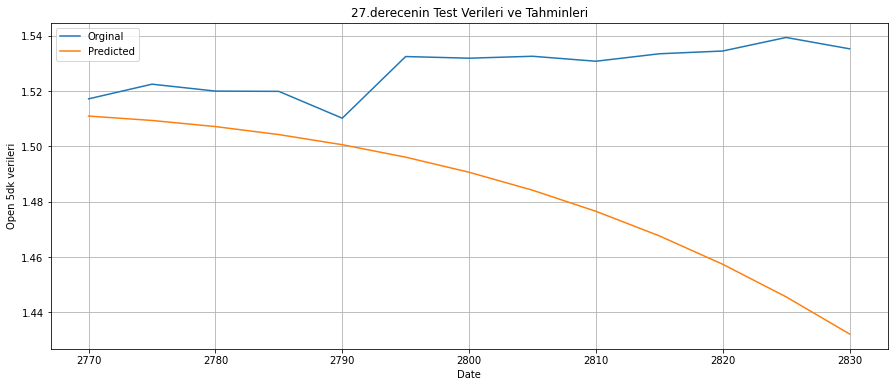

Degree 1 coefficient of determination: 0.39415939904628505
Degree 2 coefficient of determination: 0.4326921030821702
Degree 3 coefficient of determination: 0.7031251884176752
Degree 4 coefficient of determination: 0.7071315933482862
Degree 5 coefficient of determination: 0.7110909686366489
Degree 6 coefficient of determination: 0.7150002592000153
Degree 7 coefficient of determination: 0.7188565469194846
Degree 8 coefficient of determination: 0.7226570535071
Degree 9 coefficient of determination: 0.7263991453564707
Degree 10 coefficient of determination: 0.7300803374549851
Degree 11 coefficient of determination: 0.7336982967852663
Degree 12 coefficient of determination: 0.7372508452112809
Degree 13 coefficient of determination: 0.7407359618487266
Degree 14 coefficient of determination: 0.7441517849061943
Degree 15 coefficient of determination: 0.7474966130128604
Degree 16 coefficient of determination: 0.7507689060304057
Degree 17 coefficient of determination: 0.7539672853509936
Degree 1

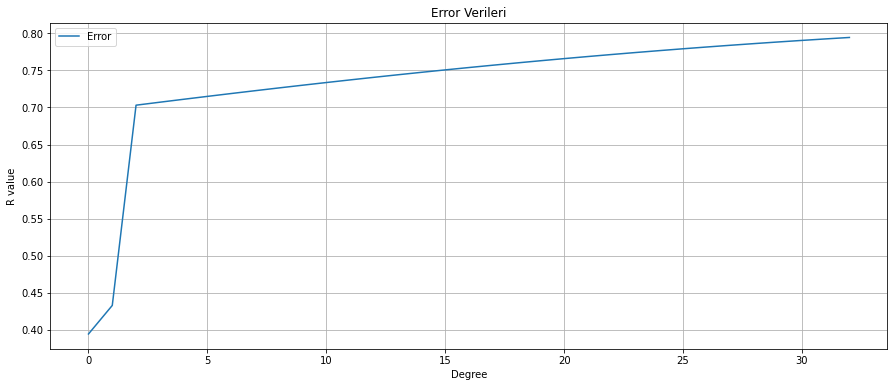

coefficient of determination: 0.794569102136669
intercept: [1.61510743]
coefficients: [[-8.27228559e-113  7.16947445e-113 -2.01572721e-117  1.64461693e-208
  -4.84685761e-195 -1.59782660e-191 -5.10754615e-188 -1.59473485e-184
  -4.88609411e-181 -1.47350057e-177 -4.38268709e-174 -1.28744507e-170
  -3.73855456e-167 -1.07373135e-163 -3.05073771e-160 -8.57467361e-157
  -2.38347764e-153 -6.54862988e-150 -1.77695615e-146 -4.75646780e-143
  -1.25396790e-139 -3.24905134e-136 -8.24981385e-133 -2.04472311e-129
  -4.91948812e-126 -1.13972363e-122 -2.51148533e-119 -5.15924088e-116
  -9.52823270e-113 -1.46495358e-109 -1.50018181e-106  9.83498727e-110
  -1.61251008e-113]]
slice_test9


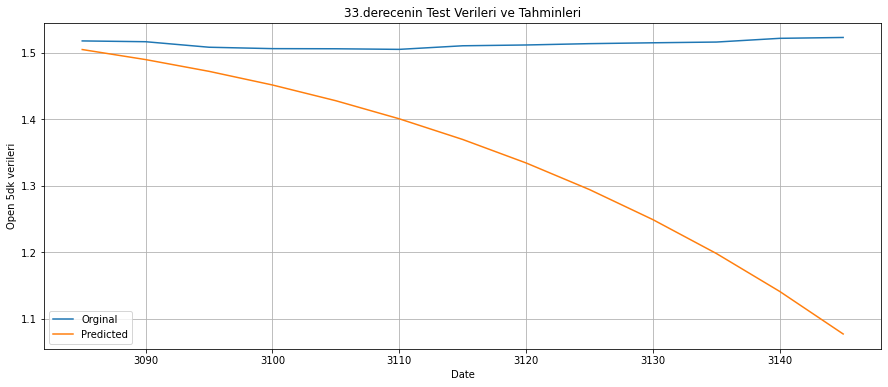

Degree 1 coefficient of determination: 0.4663017695856865
Degree 2 coefficient of determination: 0.47350023867847213
Degree 3 coefficient of determination: 0.47931695763304194
Degree 4 coefficient of determination: 0.4791677310973368
Degree 5 coefficient of determination: 0.47902405886445953
Degree 6 coefficient of determination: 0.4788861782534326
Degree 7 coefficient of determination: 0.4787543053197415
Degree 8 coefficient of determination: 0.478628634189062
Degree 9 coefficient of determination: 0.4785093366476908
Degree 10 coefficient of determination: 0.4783965617843525
Degree 11 coefficient of determination: 0.4782904357120876
Degree 12 coefficient of determination: 0.4781910613715291
Degree 13 coefficient of determination: 0.47809851841286466
Degree 14 coefficient of determination: 0.4780128631570616
Degree 15 coefficient of determination: 0.47793412863760387
Degree 16 coefficient of determination: 0.47786232471745094
Degree 17 coefficient of determination: 0.47779743828300936


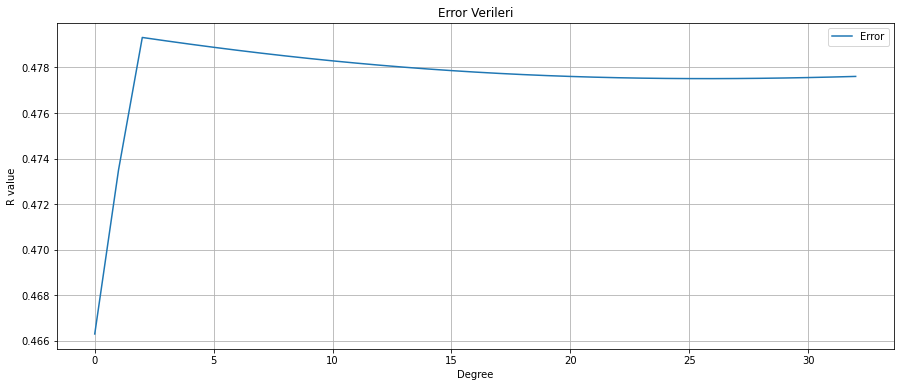

coefficient of determination: 0.47931695763304194
intercept: [53.77169863]
coefficients: [[-4.76914684e-02  1.44908091e-05 -1.46551113e-09]]
slice_test10


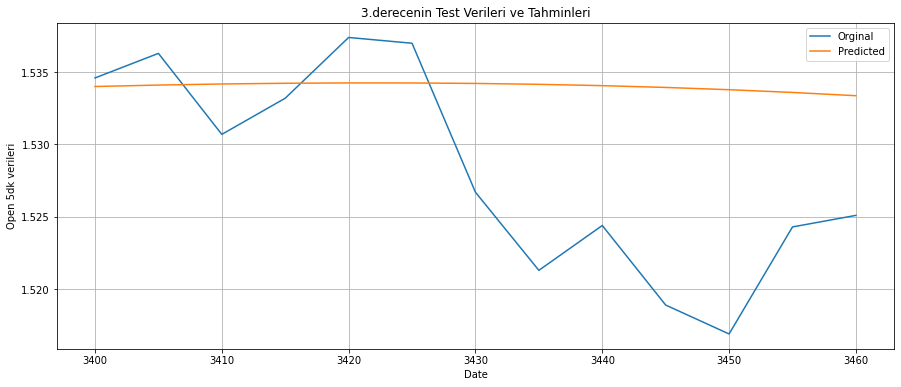

Degree 1 coefficient of determination: 0.3041242062330277
Degree 2 coefficient of determination: 0.532113742570122
Degree 3 coefficient of determination: 0.5830560316535434
Degree 4 coefficient of determination: 0.5831679808532635
Degree 5 coefficient of determination: 0.5832430760330172
Degree 6 coefficient of determination: 0.5832829749565885
Degree 7 coefficient of determination: 0.5832893775549259
Degree 8 coefficient of determination: 0.5832640228449407
Degree 9 coefficient of determination: 0.5832086865102011
Degree 10 coefficient of determination: 0.5831251782707003
Degree 11 coefficient of determination: 0.583015339186051
Degree 12 coefficient of determination: 0.5828810388841545
Degree 13 coefficient of determination: 0.5827241727132935
Degree 14 coefficient of determination: 0.5825466588467109
Degree 15 coefficient of determination: 0.5823504353138187
Degree 16 coefficient of determination: 0.5821374569853056
Degree 17 coefficient of determination: 0.5819096925082046
Degree 1

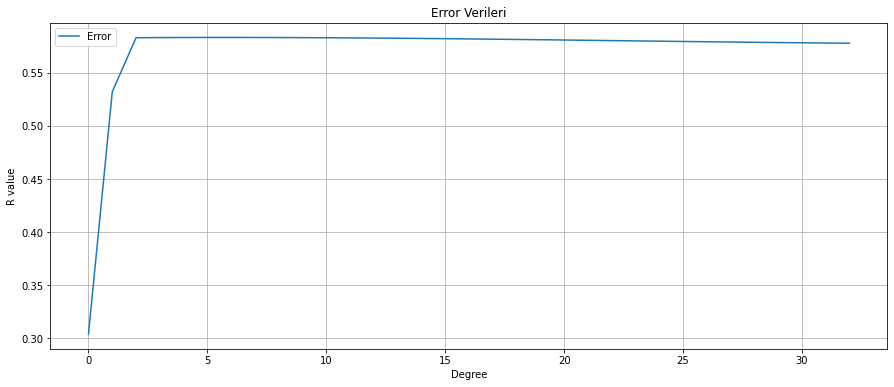

coefficient of determination: 0.5832893775549259
intercept: [10.71889851]
coefficients: [[-6.29270875e-30  2.63313483e-24 -9.71537313e-23 -2.32367951e-19
  -3.47401244e-16  1.63482103e-19 -1.97797228e-23]]
slice_test11


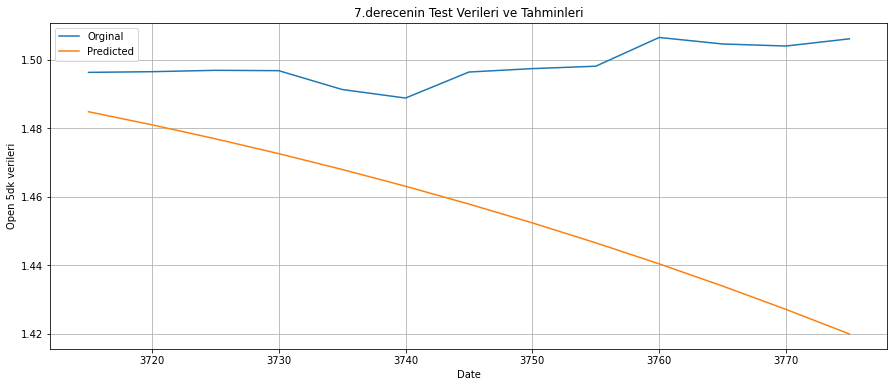

Degree 1 coefficient of determination: 0.5863380630623158
Degree 2 coefficient of determination: 0.6408647820280338
Degree 3 coefficient of determination: 0.7286695516675116
Degree 4 coefficient of determination: 0.7294097185634871
Degree 5 coefficient of determination: 0.7301013604980067
Degree 6 coefficient of determination: 0.7307442996783056
Degree 7 coefficient of determination: 0.7313384920007522
Degree 8 coefficient of determination: 0.7318840098363448
Degree 9 coefficient of determination: 0.7323810452578867
Degree 10 coefficient of determination: 0.7328299095071553
Degree 11 coefficient of determination: 0.733231032119317
Degree 12 coefficient of determination: 0.7335849597464318
Degree 13 coefficient of determination: 0.7338923546531486
Degree 14 coefficient of determination: 0.7341539929005142
Degree 15 coefficient of determination: 0.7343707622311778
Degree 16 coefficient of determination: 0.7345436596358683
Degree 17 coefficient of determination: 0.7346737886414363
Degree 

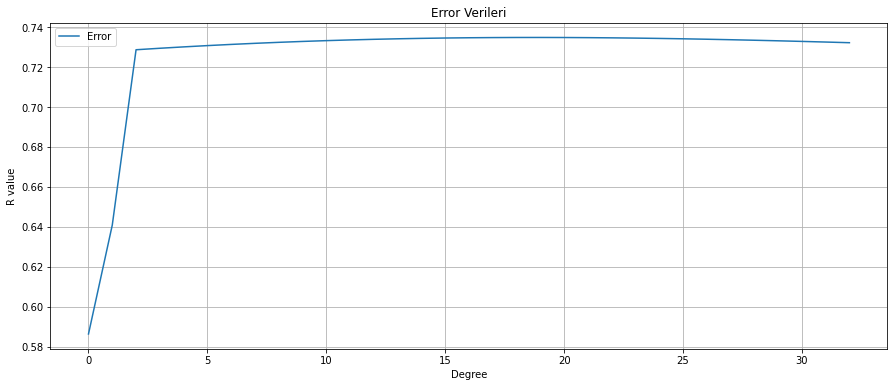

coefficient of determination: 0.7348201333319592
intercept: [1.04029004]
coefficients: [[ 2.03323040e-123  2.68896040e-069  3.52053921e-075 -4.38888196e-122
   1.45415044e-108  3.01463513e-099  5.51196779e-101  8.67577433e-098
   3.17668704e-094  1.12804474e-090  3.87795574e-087  1.28555311e-083
   4.08136713e-080  1.22688461e-076  3.42504417e-073  8.56812267e-070
   1.77939806e-066  2.45534668e-063 -1.19922605e-066  1.46755624e-070]]
slice_test12


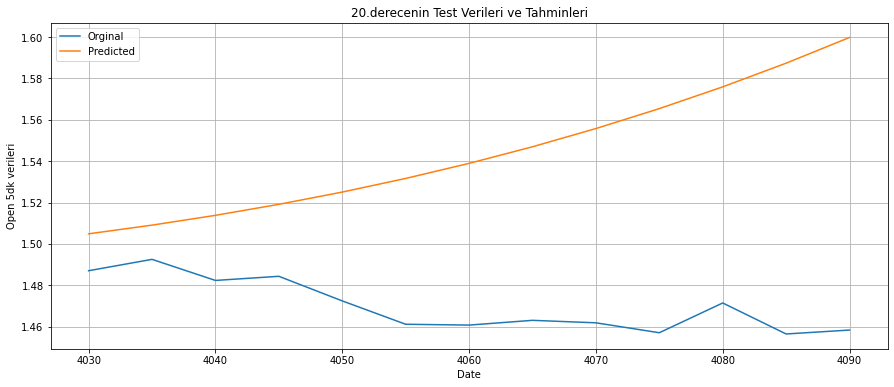

Degree 1 coefficient of determination: 0.7581637716676075
Degree 2 coefficient of determination: 0.8981543323695745
Degree 3 coefficient of determination: 0.9201483821717972
Degree 4 coefficient of determination: 0.919935556643974
Degree 5 coefficient of determination: 0.9197302548056857
Degree 6 coefficient of determination: 0.9195327364608638
Degree 7 coefficient of determination: 0.9193432390813644
Degree 8 coefficient of determination: 0.9191619762542911
Degree 9 coefficient of determination: 0.9189891369082333
Degree 10 coefficient of determination: 0.9188248844586849
Degree 11 coefficient of determination: 0.9186693559965413
Degree 12 coefficient of determination: 0.9185226615208503
Degree 13 coefficient of determination: 0.9183848832138594
Degree 14 coefficient of determination: 0.9182560747684871
Degree 15 coefficient of determination: 0.9181362607643577
Degree 16 coefficient of determination: 0.9180254360943014
Degree 17 coefficient of determination: 0.917923565445768
Degree 1

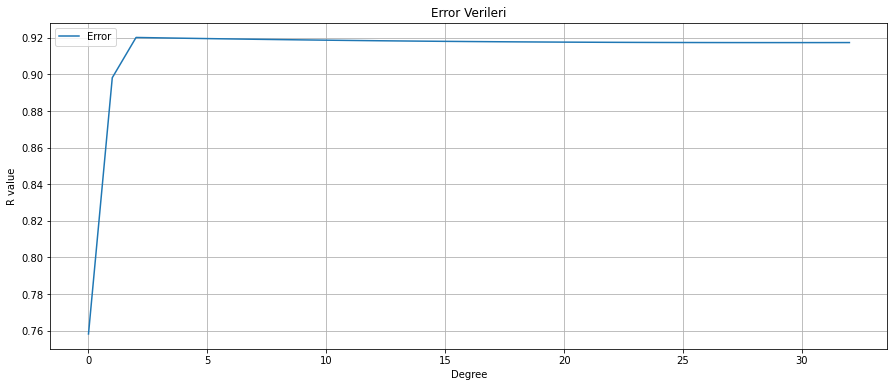

coefficient of determination: 0.9201483821717972
intercept: [835.28692713]
coefficients: [[-6.01659632e-01  1.44596944e-04 -1.15743563e-08]]
slice_test13


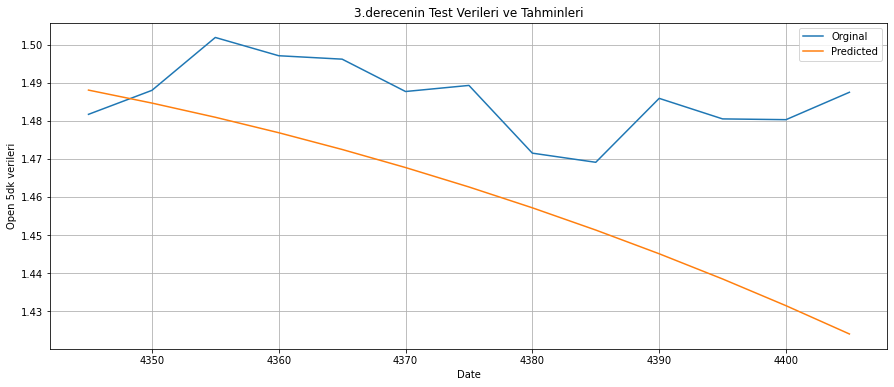

Degree 1 coefficient of determination: 0.40472385621730056
Degree 2 coefficient of determination: 0.6374496434586405
Degree 3 coefficient of determination: 0.6510296314537746
Degree 4 coefficient of determination: 0.6518368400860142
Degree 5 coefficient of determination: 0.6526884375390025
Degree 6 coefficient of determination: 0.6535828463745921
Degree 7 coefficient of determination: 0.6545184344498618
Degree 8 coefficient of determination: 0.6554935173069345
Degree 9 coefficient of determination: 0.6565063614963778
Degree 10 coefficient of determination: 0.6575551878314223
Degree 11 coefficient of determination: 0.6586381746724888
Degree 12 coefficient of determination: 0.6597534612418606
Degree 13 coefficient of determination: 0.6608991509698207
Degree 14 coefficient of determination: 0.6620733148760737
Degree 15 coefficient of determination: 0.663273994959268
Degree 16 coefficient of determination: 0.6644992075962596
Degree 17 coefficient of determination: 0.6657469469640983
Degree

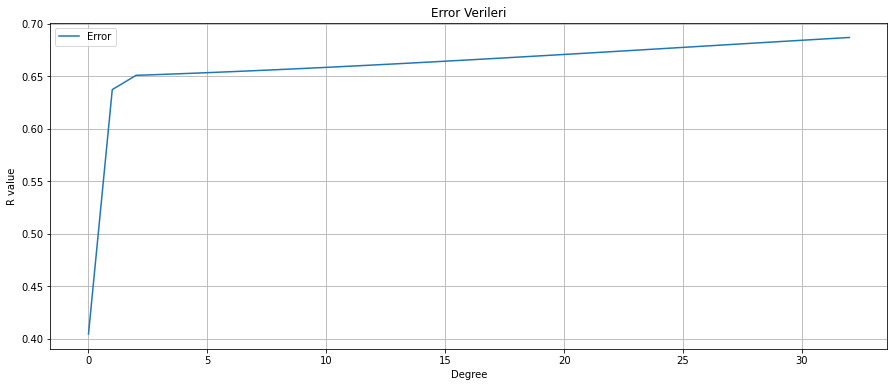

coefficient of determination: 0.6871038837064819
intercept: [1.71305423]
coefficients: [[-6.36452221e-118 -1.71060802e-117 -3.43981312e-123 -1.46488588e-219
  -2.60447789e-205 -1.31557732e-201 -6.44280966e-198 -3.08161069e-194
  -1.44619707e-190 -6.67947721e-187 -3.04235140e-183 -1.36843660e-179
  -6.08383151e-176 -2.67483554e-172 -1.16328184e-168 -5.00411232e-165
  -2.12863294e-161 -8.94893577e-158 -3.71518161e-154 -1.52132353e-150
  -6.13491527e-147 -2.43117071e-143 -9.44042469e-140 -3.57785172e-136
  -1.31613464e-132 -4.66149091e-129 -1.57019405e-125 -4.93013239e-122
  -1.39151579e-118 -3.26930759e-115 -5.11546739e-112  2.16984245e-115
  -2.30257286e-119]]
slice_test14


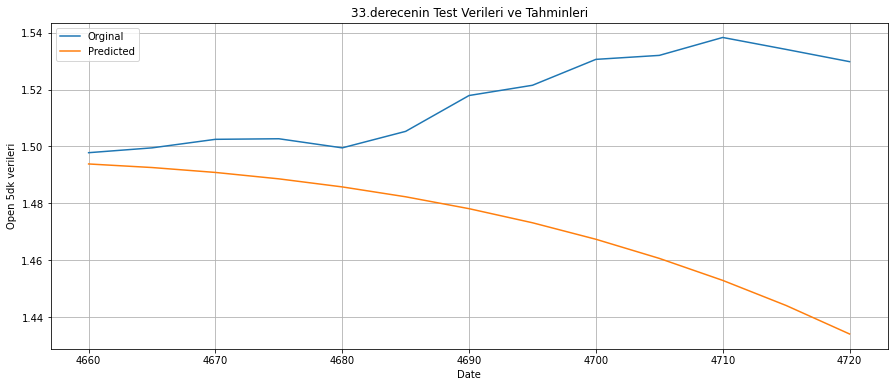

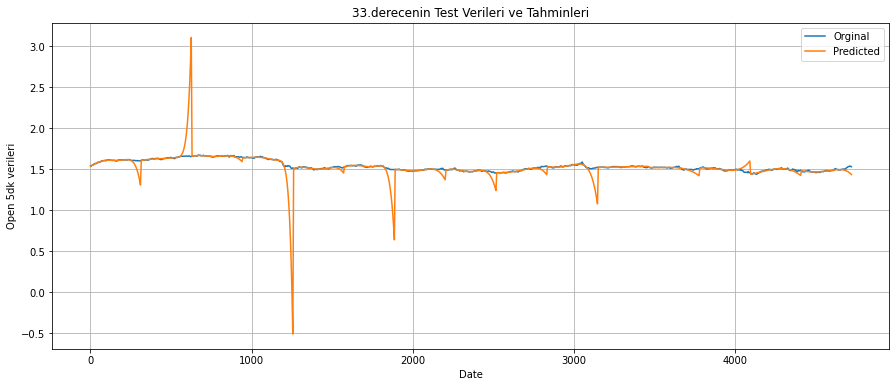

In [150]:
sliced_reg()